## 시험점수 예측

### 1. 데이터셋 불러오기

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import MaxNLocator

# 시각화 스타일 설정
#sns.set_palette('husl')
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 로드
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(f'Train 데이터 크기: {train.shape}')
print(f'Test 데이터 크기: {test.shape}')

# Train과 Test 데이터 합치기 (분석용)
all_data = pd.concat([train, test], ignore_index=True)
print(f'전체 데이터 크기 (Train + Test): {all_data.shape}')

Train 데이터 크기: (188533, 13)
Test 데이터 크기: (125690, 12)
전체 데이터 크기 (Train + Test): (314223, 13)


In [3]:
# 데이터 확인
print('=== 전체 데이터 (Train + Test) 상위 5개 ===' )
display(all_data.head())

print('\n=== Test 데이터 상위 5개 ===')
display(test.head())

=== 전체 데이터 (Train + Test) 상위 5개 ===


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0



=== Test 데이터 상위 5개 ===


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [4]:
df = pd.concat([train, test], axis=0).reset_index(drop=True)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (314223, 13)


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0


# 🚗 **중고차 가격 예측 데이터셋 명세서**

### **1. 데이터 개요**

| 항목 | 내용 |
| :--- | :--- |
| **데이터셋 파일** | [data/train.csv](cci:7://file:///Users/choiseoyeon/github/sklearn-est15th/team%20assignment/choiseoyeon.car/data/train.csv:0:0-0:0) |
| **데이터 크기** | 188,533 행 (Rows) × 13 열 (Columns) |
| **해결 문제** | 회귀 (Regression) - 중고차 가격 예측 |
| **타겟 변수 (Target)** | **`price`** (차량 가격) |

<br>

### **2. 컬럼 상세 설명**

| 컬럼명 (Column) | 데이터 타입 | 설명 (Description) | 예시 데이터 | 비고 (Notes) |
| :--- | :--- | :--- | :--- | :--- |
| **`id`** | Integer | 고유 식별자 | `0`, `1`, `2` ... | 모델 학습 시 제외 (Index 역할) |
| **`brand`** | Object | 제조사 브랜드 | `MINI`, `Lincoln`, `Mercedes-Benz` | 총 57개 브랜드 존재 |
| **`model`** | Object | 차량 모델명 | `Cooper S Base`, `LS V8` | 범주가 매우 많음 (약 1,800개 이상) |
| **`model_year`** | Integer | 차량 연식 | `2007`, `2022` | `2024 - model_year`로 '차량 연령' 파생변수 생성 가능 |
| **`milage`** | Integer | 주행 거리 (마일) | `213000`, `19500` | 가격에 반비례하는 주요 변수 |
| **`fuel_type`** | Object | 연료 종류 | `Gasoline`, `Diesel`, `Hybrid` | **결측치 존재** (최빈값 등으로 대체 필요) |
| **`engine`** | Object | 엔진 세부 스펙 | `172.0HP 1.6L 4 Cylinder...` | 마력(HP), 배기량(L), 실린더 수 등을 분리하여 숫자형 변수로 변환 필요 |
| **`transmission`** | Object | 변속기 종류 | `A/T`, `8-Speed A/T` | '자동/수동' 여부나 '기어 단수'만 추출하여 단순화 가능 |
| **`ext_col`** | Object | 외장 색상 | `Yellow`, `Black`, `White` | 색상 종류가 다양하여 주요 색상 외에는 'Other'로 묶기 권장 |
| **`int_col`** | Object | 내장 색상 | `Gray`, `Beige`, `Black` | `ext_col`과 유사하게 처리 필요 |
| **`accident`** | Object | 사고 이력 | `None reported`, `At least 1...` | **결측치** 및 텍스트 데이터를 '무사고/유사고' (0/1)로 변환 필요 |
| **`clean_title`** | Object | 클린 타이틀 여부 | `Yes`, `NaN` (결측치) | **결측치**가 많음. `NaN`은 `No`로 간주하여 이진 변수(Yes/No)로 처리 가능 |
| **`price`** | Integer | **차량 가격 (Target)** | `4200`, `45000` | 예측해야 할 정답 값. 값의 분포가 넓어 **로그 변환** 고려 필요 |

<br>

### **3. 주요 전처리 포인트 요약**

| 구분 | 주요 조치 사항 |
| :--- | :--- |
| **결측치 처리** | `fuel_type`, `accident` (결측치 처리), `clean_title` (NaN → No로 변환) |
| **피처 엔지니어링** | `engine`에서 **마력(HP)**, **배기량(L)** 추출 / `model_year`로 **차량 나이** 계산 |
| **범주형 변수** | `brand`, `model` 등 종류가 많은 변수는 **Label Encoding** 또는 **Target Encoding** 고려 |
| **타겟 변수** | `price` 분포 확인 후 치우침이 심하면 **Log Scaling** 적용 |

In [5]:
# 데이터 정보 확인
print('=== Train 데이터 정보 ===')
train.info()

=== Train 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
# 기술 통계량
print('=== Train 데이터 기술 통계량 ===')
train.describe()

=== Train 데이터 기술 통계량 ===


,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [7]:
# 결측치 확인
print('=== Train 결측치 ===' )
print(train.isnull().sum())
print(f'\n결측치 비율(%):')
print((train.isnull().sum() / len(train) * 100).round(2))

=== Train 결측치 ===
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

결측치 비율(%):
id               0.00
brand            0.00
model            0.00
model_year       0.00
milage           0.00
fuel_type        2.70
engine           0.00
transmission     0.00
ext_col          0.00
int_col          0.00
accident         1.30
clean_title     11.36
price            0.00
dtype: float64


### 데이터분석(EDA)

Object 타입 컬럼 목록: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


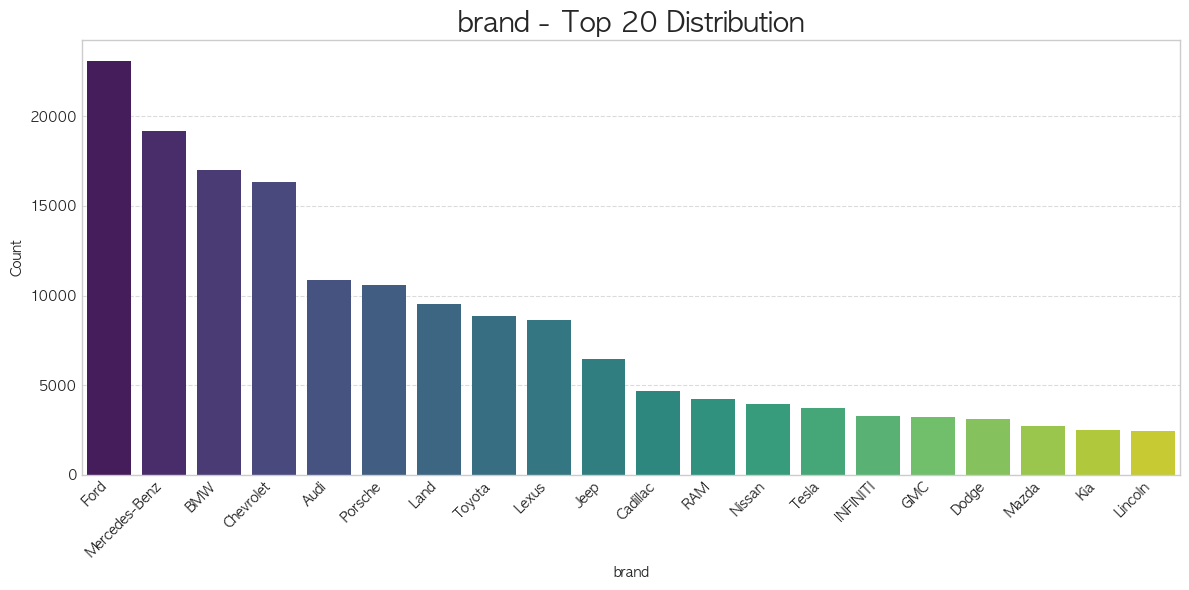

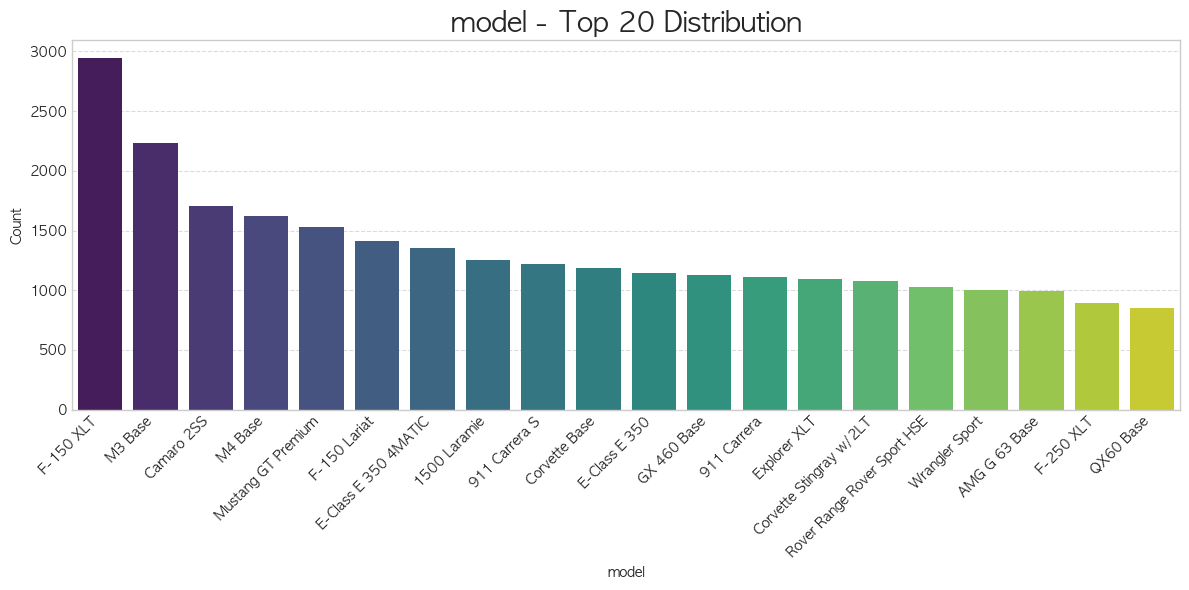

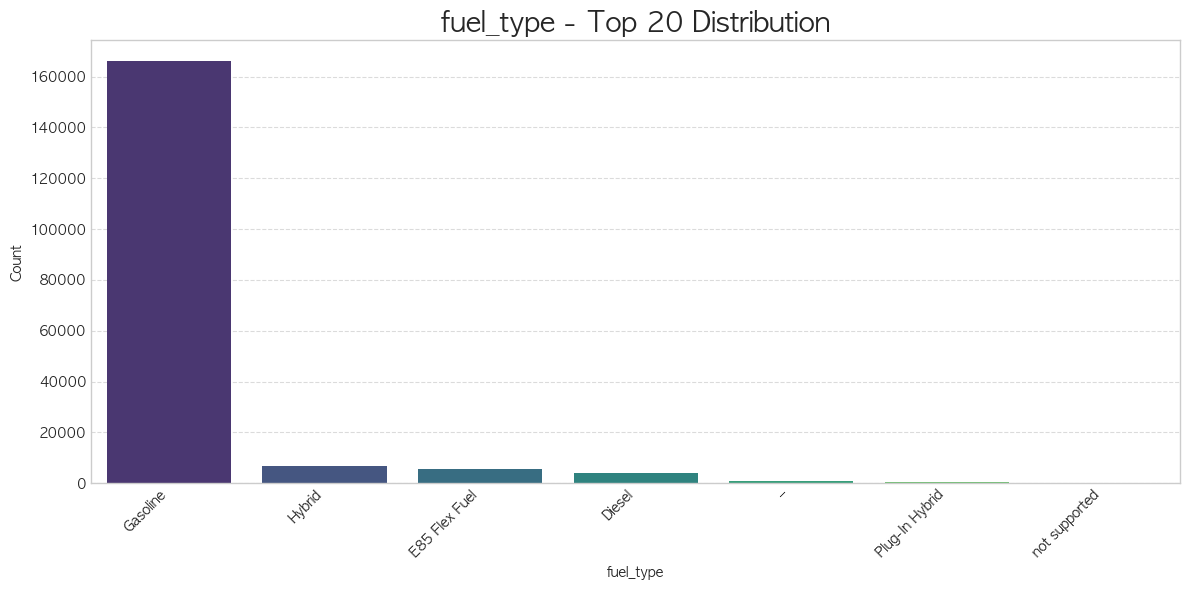

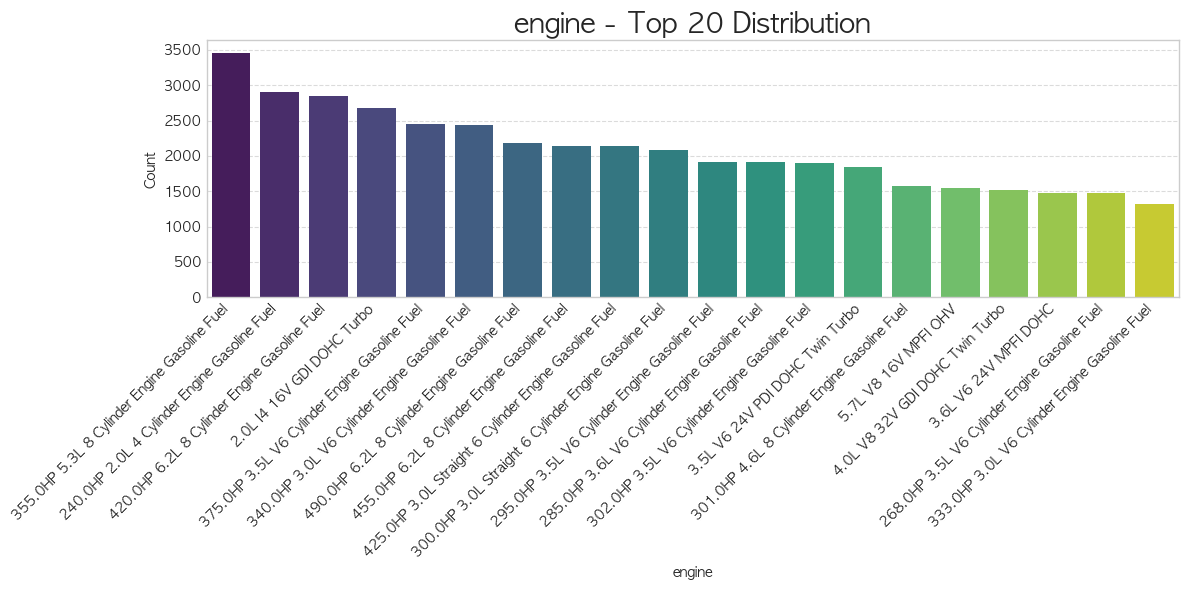

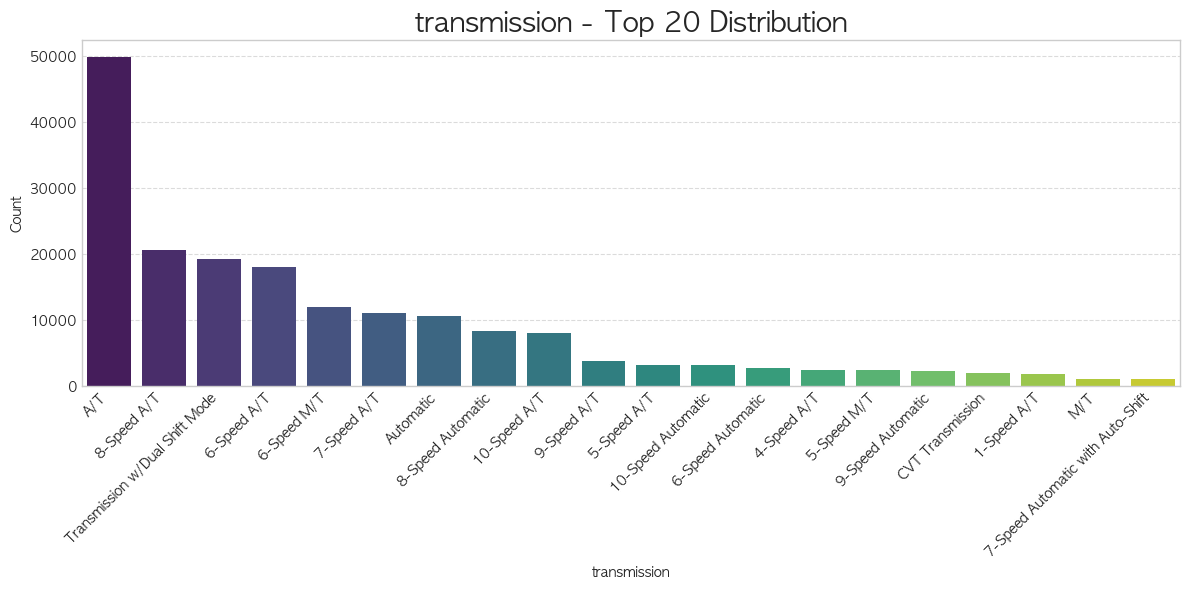

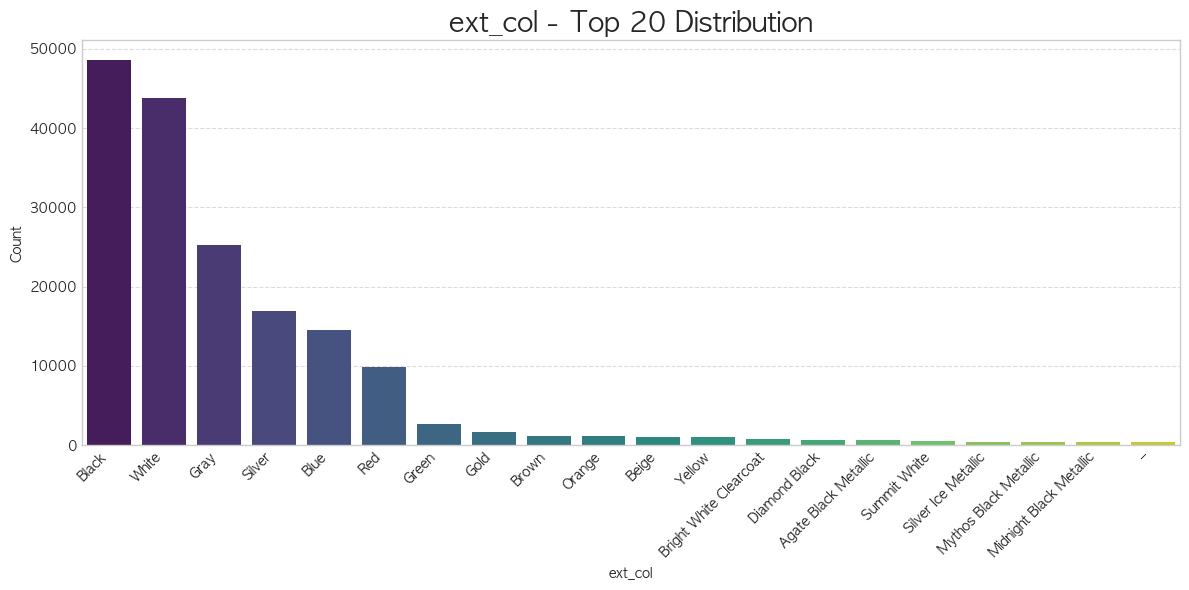

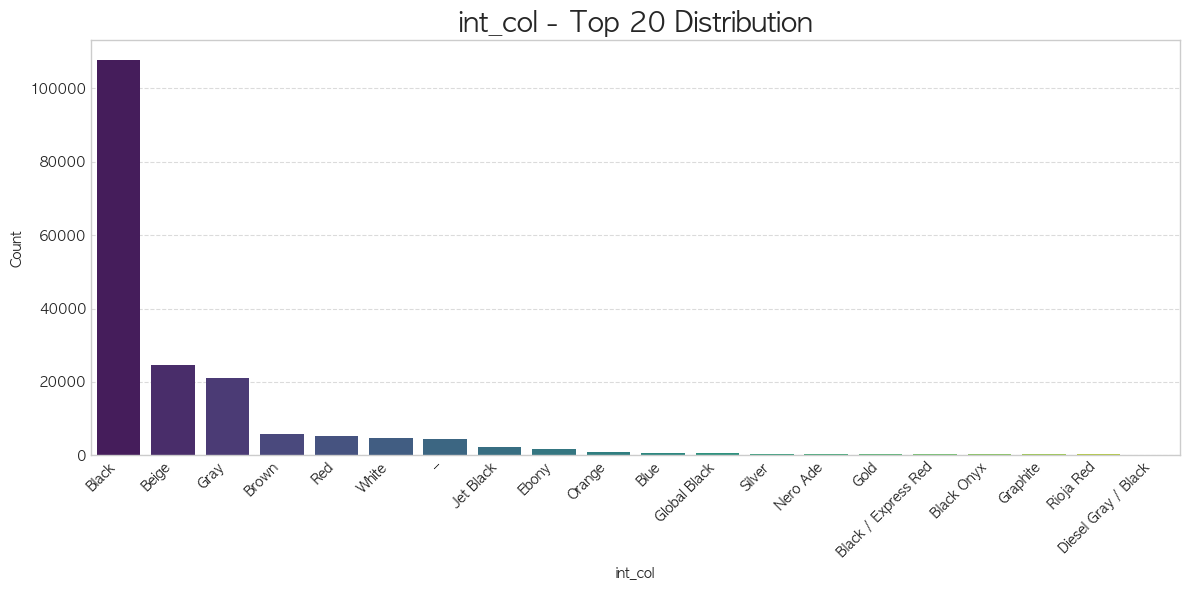

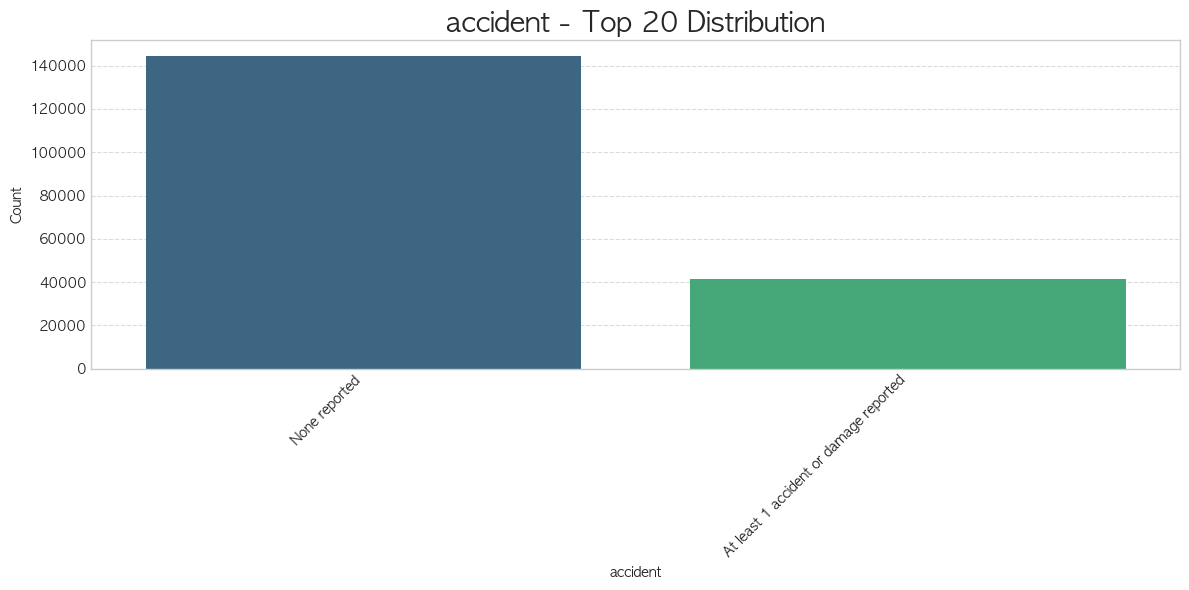

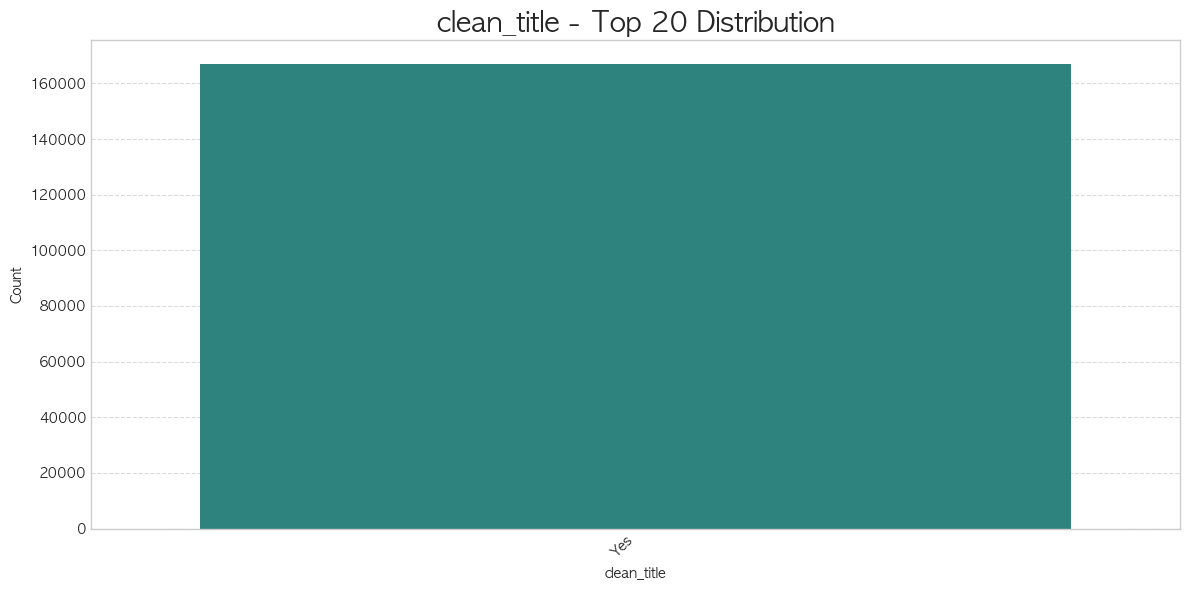

In [8]:
# 데이터 타입이 object인 컬럼만 선택
object_columns = train.select_dtypes(include=['object']).columns

print(f"Object 타입 컬럼 목록: {list(object_columns)}")

# 각 컬럼별로 시각화 (범주가 너무 많으면 상위 20개만 표시)
for col in object_columns:
    plt.figure(figsize=(12, 6))
    
    # 빈도수 상위 20개 추출
    top_20 = train[col].value_counts().nlargest(20)
    
    # 막대 그래프 그리기
    sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')
    
    plt.title(f'{col} - Top 20 Distribution', fontsize=20)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # x축 라벨 45도 회전
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### **target**

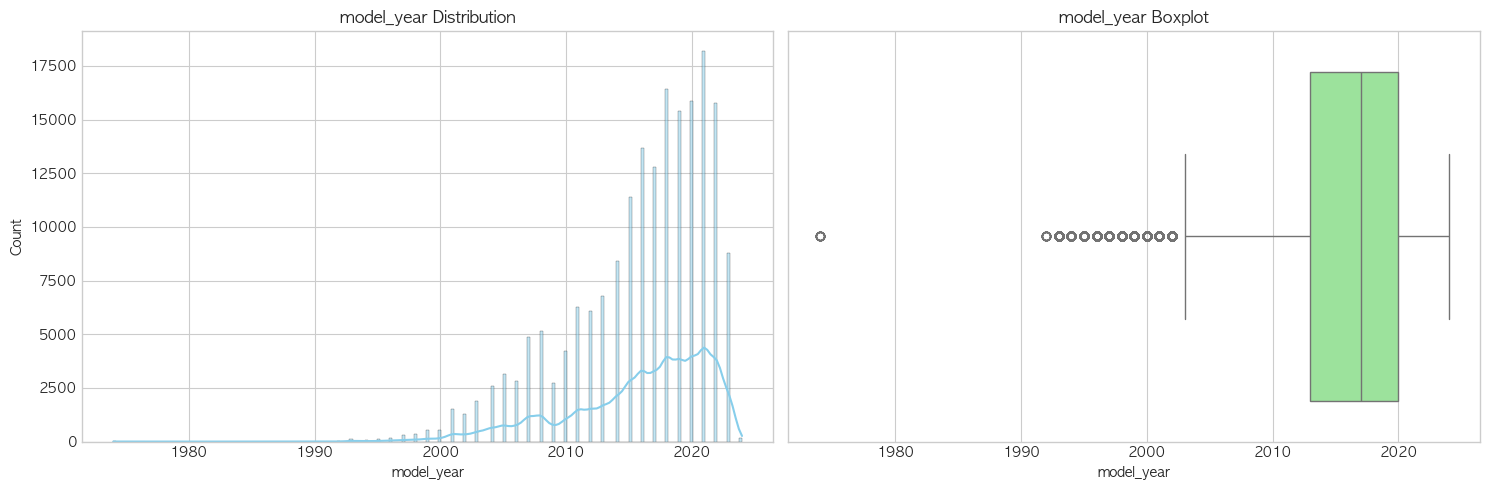

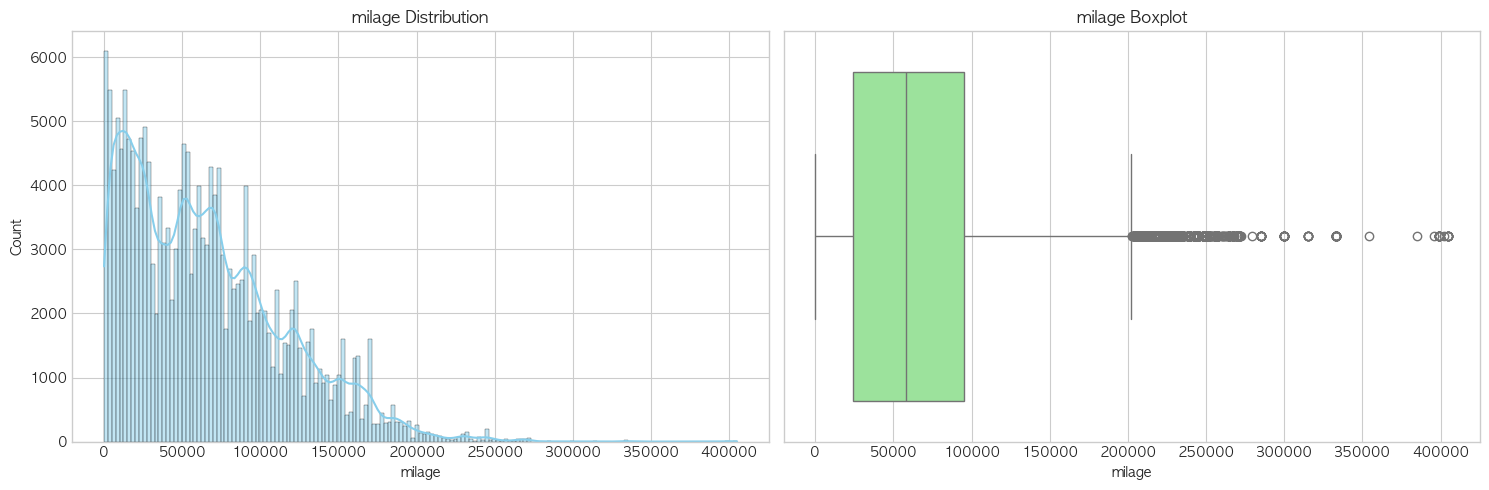

In [9]:
# 시각화할 컬럼 리스트
numeric_cols = ['model_year', 'milage']

# 그래프 그리기 (각 컬럼별로 히스토그램과 박스플롯)
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # 히스토그램 (분포 확인)
    sns.histplot(train[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} Distribution')
    
    # 박스플롯 (이상치 확인)
    sns.boxplot(x=train[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} Boxplot')
    
    plt.tight_layout()
    plt.show()

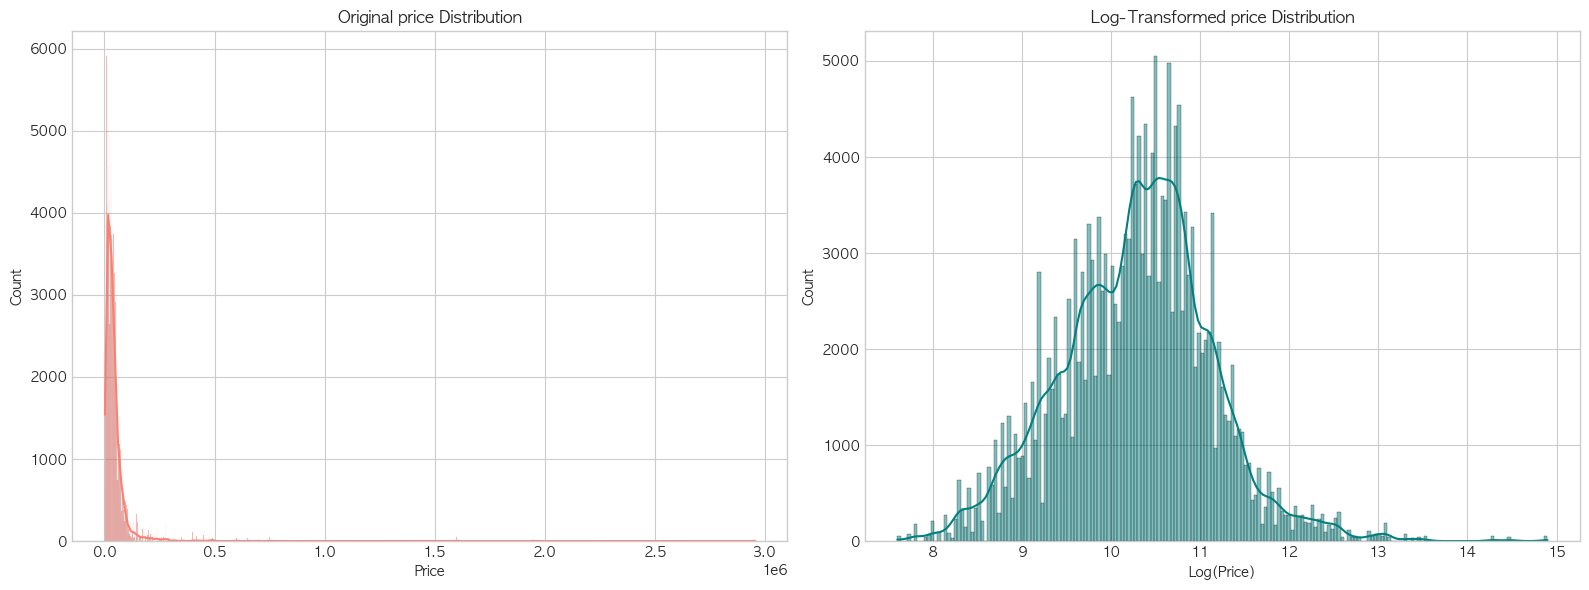


=== Price Statistics ===
count     188533.000000
mean       43878.016178
std        78819.522254
min         2000.000000
25%        17000.000000
50%        30825.000000
75%        49900.000000
max      2954083.000000
Name: price, dtype: object


In [10]:
import numpy as np

# Target 변수: price
target_col = 'price'

# 2개의 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 원본 Price 분포 (Histogram)
sns.histplot(train[target_col], kde=True, ax=axes[0], color='salmon')
axes[0].set_title(f'Original {target_col} Distribution')
axes[0].set_xlabel('Price')

# 2. 로그 변환된 Price 분포 (Histogram + Log Scale)
# log1p: log(1 + x)를 적용하여 0인 경우 발생할 수 있는 오류 방지
sns.histplot(np.log1p(train[target_col]), kde=True, ax=axes[1], color='teal')
axes[1].set_title(f'Log-Transformed {target_col} Distribution')
axes[1].set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

# 기본 통계량 출력
print("\n=== Price Statistics ===")
print(train[target_col].describe().apply(lambda x: format(x, 'f')))

### **brand**

In [11]:
# 브랜드와 모델의 고유값 개수(Cardinality) 계산
n_brands = train['brand'].nunique()
n_models = train['model'].nunique()

print(f"총 브랜드 개수: {n_brands}")
print(f"총 모델 개수: {n_models}")

# (선택) 가장 많은 모델 상위 10개 출력해보기
print("\n[ 가장 많은 모델 Top 10 ]")
print(train['model'].value_counts().head(10))

총 브랜드 개수: 57
총 모델 개수: 1897

[ 가장 많은 모델 Top 10 ]
model
F-150 XLT               2945
M3 Base                 2229
Camaro 2SS              1709
M4 Base                 1622
Mustang GT Premium      1526
F-150 Lariat            1410
E-Class E 350 4MATIC    1357
1500 Laramie            1249
911 Carrera S           1219
Corvette Base           1184
Name: count, dtype: int64


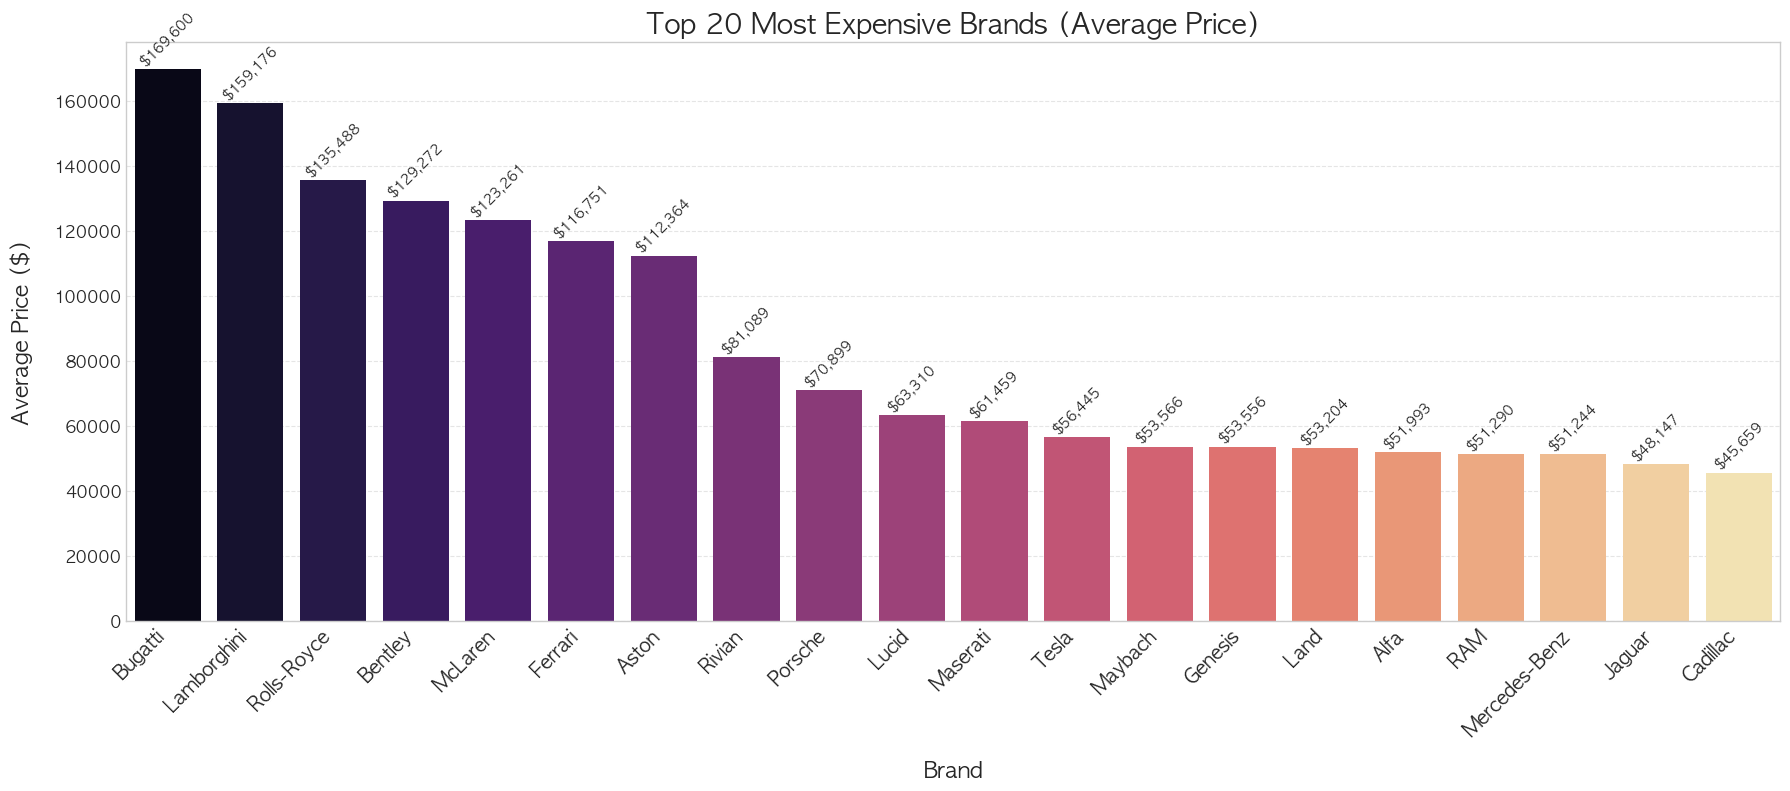

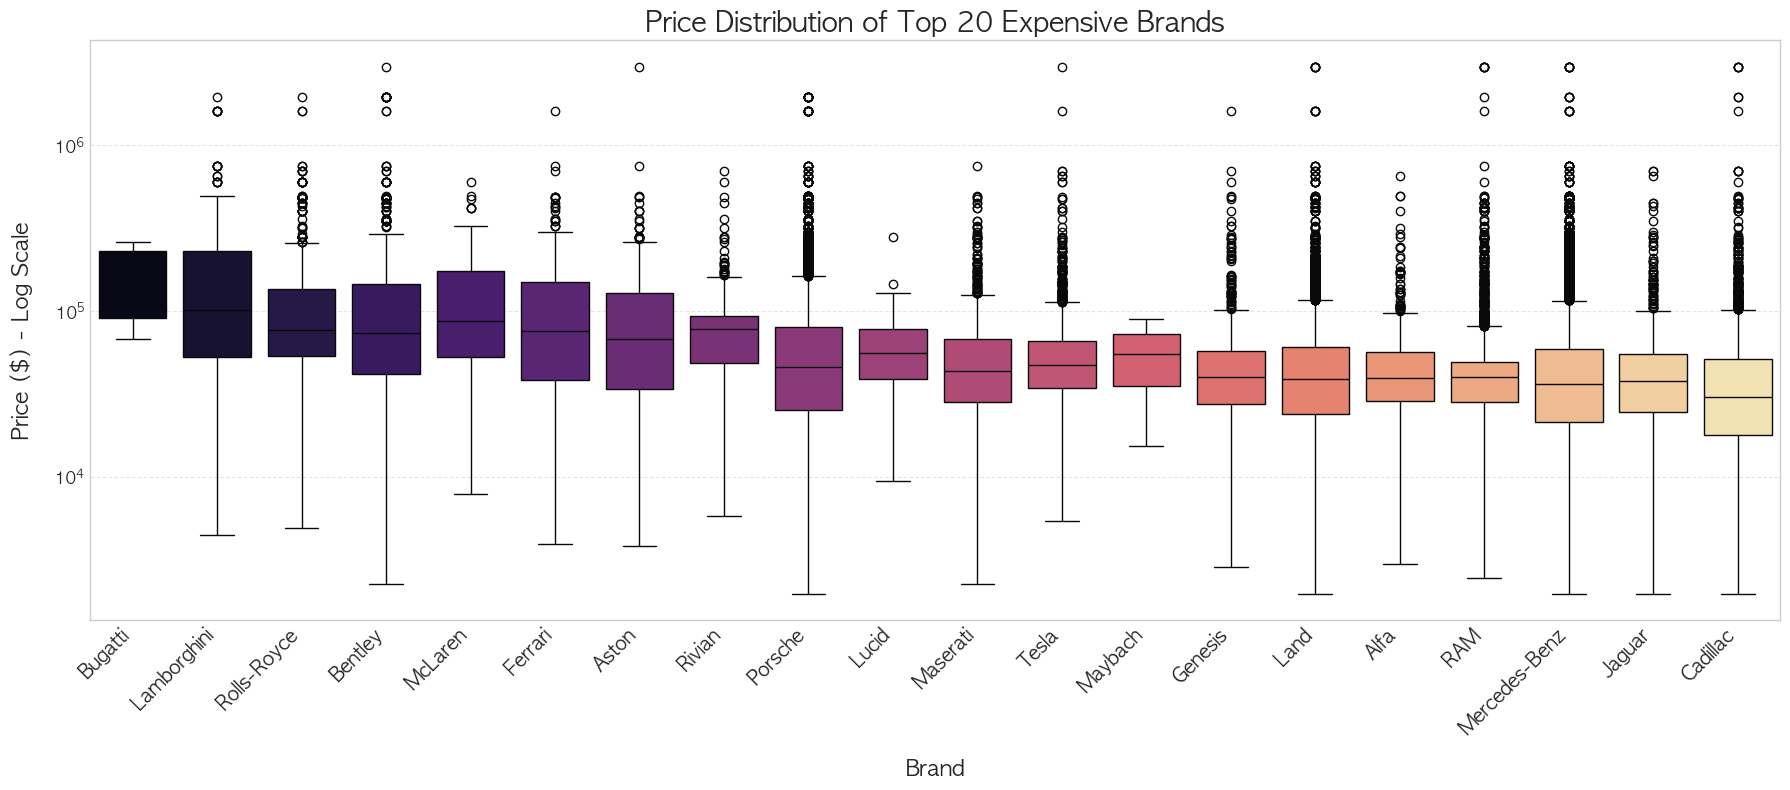

In [12]:
# 상위 10개 브랜드만 선택 (너무 많으면 보기 힘드므로)
top_n = 20
top_brands_by_price = train.groupby('brand')['price'].mean().sort_values(ascending=False).head(top_n).index
subset_df = train[train['brand'].isin(top_brands_by_price)]

# 1. 평균 가격 상위 20개 브랜드 (Bar Chart)
plt.figure(figsize=(18, 8)) # 그래프 크기 더 키움
sns.barplot(
    x='brand', 
    y='price', 
    data=subset_df, 
    order=top_brands_by_price, 
    palette='magma', 
    errorbar=None
)

plt.title(f'Top {top_n} Most Expensive Brands (Average Price)', fontsize=20, fontweight='bold')
plt.xlabel('Brand', fontsize=16, labelpad=15)
plt.ylabel('Average Price ($)', fontsize=16, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=14) # 글자 크기 키우고 회전
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시 (선택사항 - 각 막대 위에 가격 표시)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1000, 
                   f'${int(height):,}', ha='center', fontsize=10, rotation=45)

plt.tight_layout()
plt.show()


# 2. 분포 확인용 Boxplot (Log Scale 적용)
plt.figure(figsize=(18, 8))
sns.boxplot(
    x='brand', 
    y='price', 
    data=subset_df, 
    order=top_brands_by_price, 
    palette='magma'
)

plt.title(f'Price Distribution of Top {top_n} Expensive Brands', fontsize=20, fontweight='bold')
plt.xlabel('Brand', fontsize=16, labelpad=15)
plt.ylabel('Price ($) - Log Scale', fontsize=16, labelpad=15)
plt.yscale('log') # 로그 스케일 적용 (가격 차이가 커서 보기 편함)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
# 1. 각 브랜드별 '가격 중위값(Median Price)' 계산
# (평균보다 중위값이 이상치 영향을 덜 받아서 더 안전합니다)
brand_map = train.groupby('brand')['price'].median()

# 2. 계산된 값을 새로운 숫자 컬럼('brand_encoded')으로 만들기
train['brand_encoded'] = train['brand'].map(brand_map)

# 3. 잘 바뀌었는지 확인
print("=== 브랜드 인코딩 결과 ===")
print(train[['brand', 'brand_encoded']].head())

=== 브랜드 인코딩 결과 ===
           brand  brand_encoded
0           MINI        12992.5
1        Lincoln        23500.0
2      Chevrolet        32000.0
3        Genesis        39999.0
4  Mercedes-Benz        36570.0


In [14]:
# 1. 컬럼이 진짜 생겼는지 이름 출력해보기
print("=== 현재 데이터의 컬럼 목록 ===")
print([c for c in train.columns if 'encoded' in c])

# 2. 데이터가 잘 들어갔는지 눈으로 보기
print("\n=== 데이터 샘플 (원래값 vs 인코딩값) ===")
if 'brand_encoded' in train.columns:
    print(train[['brand', 'brand_encoded']].head())
else:
    print("🚨 아직 인코딩 컬럼이 안 만들어졌습니다! 위쪽의 for문 코드를 다시 실행하세요!")

=== 현재 데이터의 컬럼 목록 ===
['brand_encoded']

=== 데이터 샘플 (원래값 vs 인코딩값) ===
           brand  brand_encoded
0           MINI        12992.5
1        Lincoln        23500.0
2      Chevrolet        32000.0
3        Genesis        39999.0
4  Mercedes-Benz        36570.0


### **model**

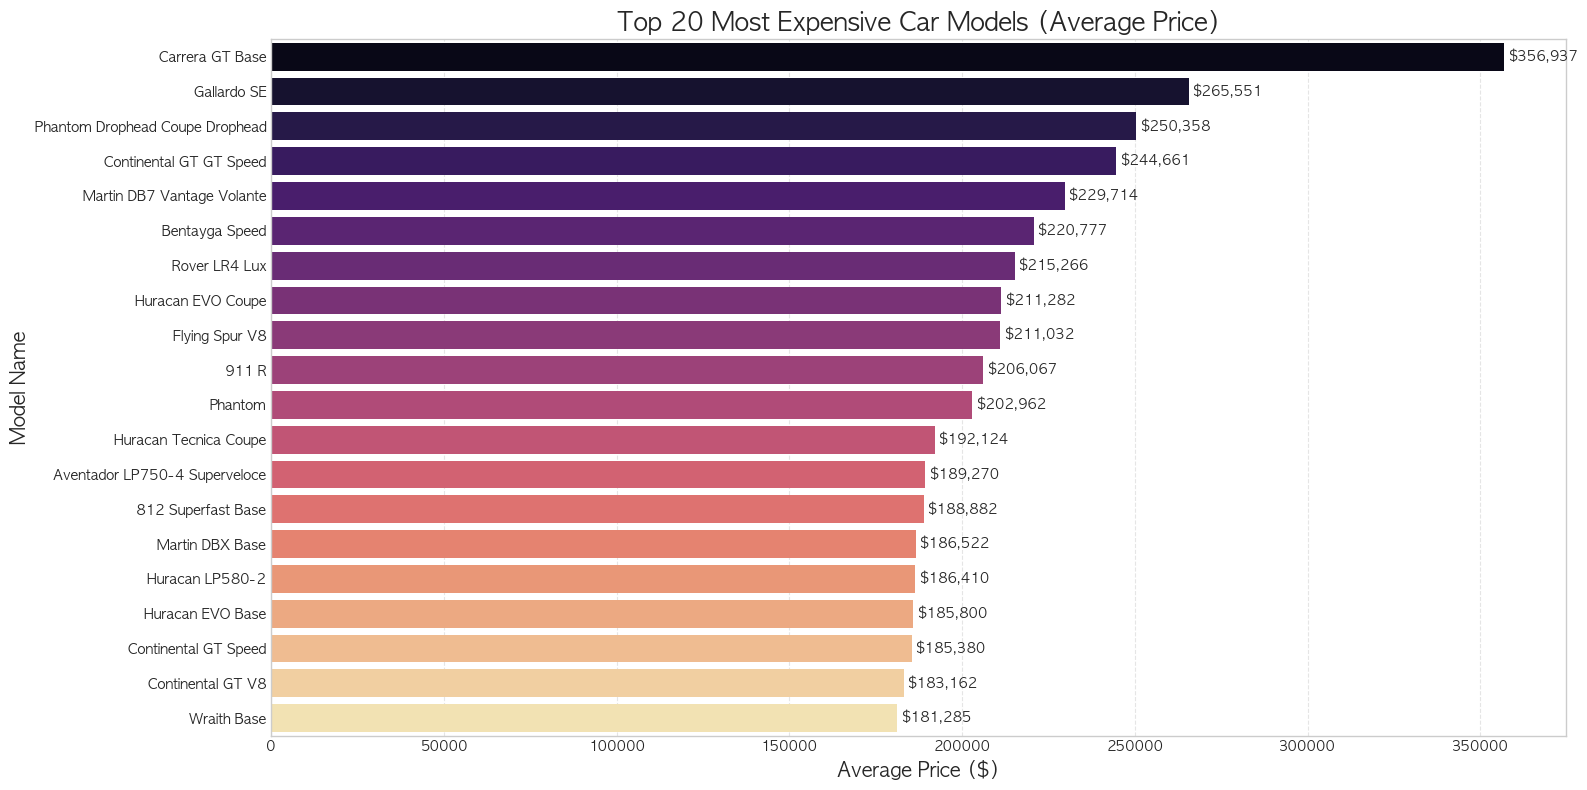

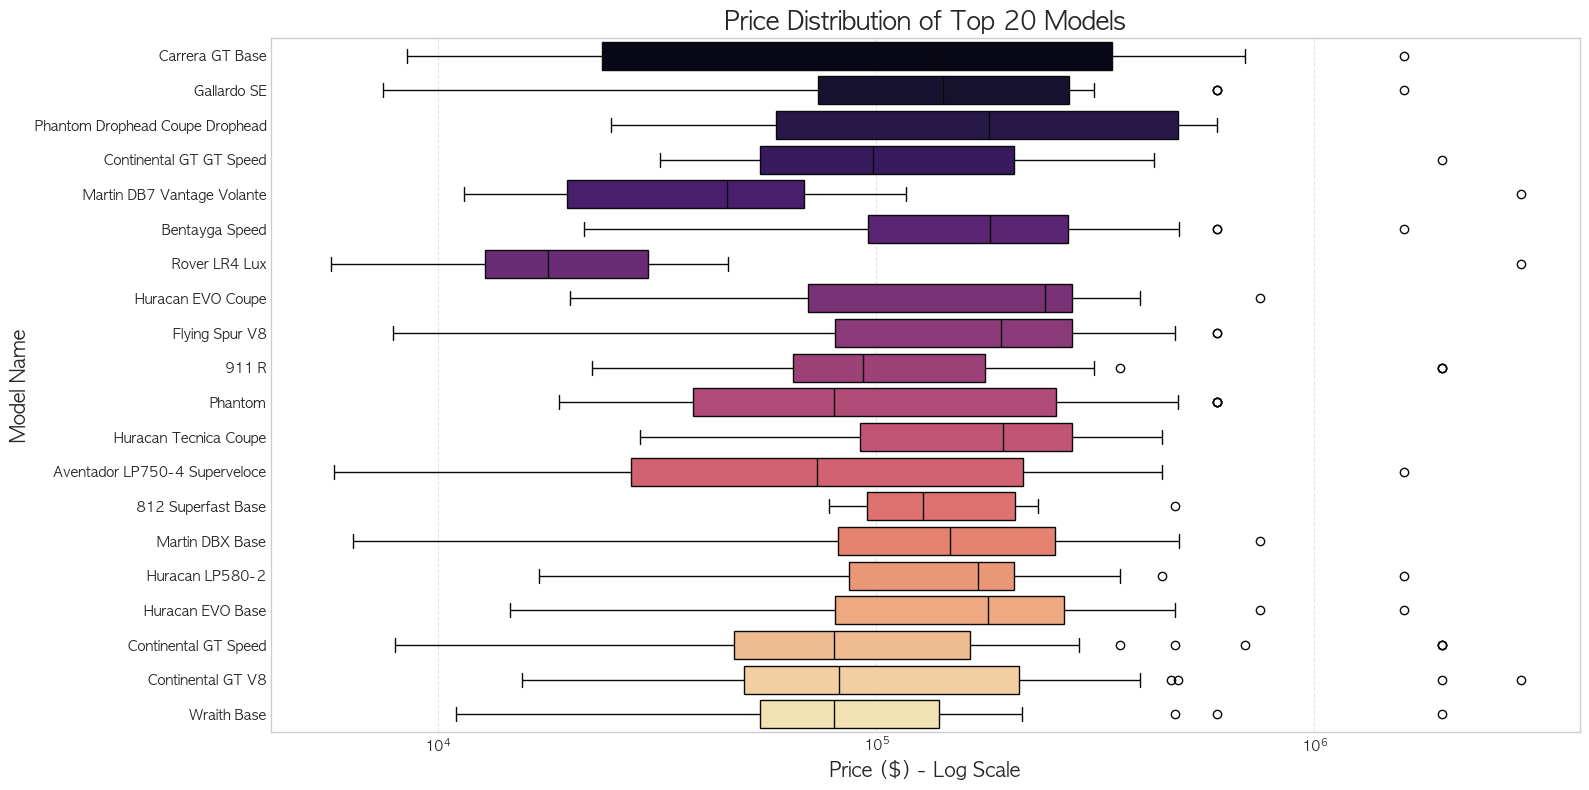

In [15]:
# 모델별 평균 가격 계산 및 상위 20개 추출
top_20_models = train.groupby('model')['price'].mean().sort_values(ascending=False).head(20).index
subset_models = train[train['model'].isin(top_20_models)]

# 1. 평균 가격 상위 20개 모델 (Bar Plot)
plt.figure(figsize=(16, 8))
sns.barplot(
    y='model', 
    x='price', 
    data=subset_models, 
    order=top_20_models, 
    palette='magma', 
    errorbar=None
)
plt.title('Top 20 Most Expensive Car Models (Average Price)', fontsize=18)
plt.xlabel('Average Price ($)', fontsize=14)
plt.ylabel('Model Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 가격 텍스트 표시
for i, p in enumerate(plt.gca().patches):
    width = p.get_width()
    plt.gca().text(width + 1000, p.get_y() + p.get_height()/2, 
             f'${int(width):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. 모델별 가격 분포 (Boxplot + Log Scale)
plt.figure(figsize=(16, 8))
sns.boxplot(
    y='model', 
    x='price', 
    data=subset_models, 
    order=top_20_models, 
    palette='magma'
)
plt.title('Price Distribution of Top 20 Models', fontsize=18)
plt.xlabel('Price ($) - Log Scale', fontsize=14)
plt.ylabel('Model Name', fontsize=14)
plt.xscale('log') # 가격 편차가 크므로 로그 스케일 적용
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [16]:
# =========================================================
# [업그레이드] 모델 인코딩 (Unknown Model -> Brand Median)
# =========================================================

# 1. '모델별' 가격 중위값 계산 (기본 전략)
model_map = train.groupby('model')['price'].median()

# 2. '브랜드별' 가격 중위값 계산 (구원투수 전략 - 추가됨!)
brand_map = train.groupby('brand')['price'].median()

# 3. Train/Test에 1차 매핑 (모델 기준)
train['model_encoded'] = train['model'].map(model_map)
test['model_encoded'] = test['model'].map(model_map)

# ---------------------------------------------------------
# 4. [핵심 변경] 결측치(모르는 모델) 채우기 전략
# ---------------------------------------------------------
print(f"1차 매핑 후 Test 결측치(모르는 모델) 개수: {test['model_encoded'].isna().sum()}개")

# (1) 모르는 모델은 -> 그 차의 '브랜드 중위값'으로 채운다!
test['model_encoded'] = test['model_encoded'].fillna(test['brand'].map(brand_map))

# (2) 혹시 브랜드조차 처음 보는 거라면? -> '전체 중위값'으로 채운다 (최후의 보루)
global_median = train['price'].median()
test['model_encoded'] = test['model_encoded'].fillna(global_median)

# (Train 데이터도 혹시 모를 결측치 방지)
train['model_encoded'] = train['model_encoded'].fillna(global_median)

# 5. 결과 확인
print(f"최종 보정 후 Test 결측치 개수: {test['model_encoded'].isna().sum()}개 (0이 나와야 함)")
print("✅ 모델 인코딩 완료! (계층적 채우기 적용됨)")
print(train[['brand', 'model', 'model_encoded']].head())

1차 매핑 후 Test 결측치(모르는 모델) 개수: 1개
최종 보정 후 Test 결측치 개수: 0개 (0이 나와야 함)
✅ 모델 인코딩 완료! (계층적 채우기 적용됨)
           brand              model  model_encoded
0           MINI      Cooper S Base        10700.0
1        Lincoln              LS V8        10299.0
2      Chevrolet  Silverado 2500 LT        21497.5
3        Genesis   G90 5.0 Ultimate        40655.0
4  Mercedes-Benz        Metris Base        43900.0


In [17]:
# 1. 컬럼이 진짜 생겼는지 이름 출력해보기
print("=== 현재 데이터의 컬럼 목록 ===")
print([c for c in train.columns if 'encoded' in c])

# 2. 데이터가 잘 들어갔는지 눈으로 보기
print("\n=== 데이터 샘플 (원래값 vs 인코딩값) ===")
if 'brand_encoded' in train.columns:
    print(train[['model', 'model_encoded']].head())
else:
    print("🚨 아직 인코딩 컬럼이 안 만들어졌습니다! 위쪽의 for문 코드를 다시 실행하세요!")

=== 현재 데이터의 컬럼 목록 ===
['brand_encoded', 'model_encoded']

=== 데이터 샘플 (원래값 vs 인코딩값) ===
               model  model_encoded
0      Cooper S Base        10700.0
1              LS V8        10299.0
2  Silverado 2500 LT        21497.5
3   G90 5.0 Ultimate        40655.0
4        Metris Base        43900.0


### **fuel_type**

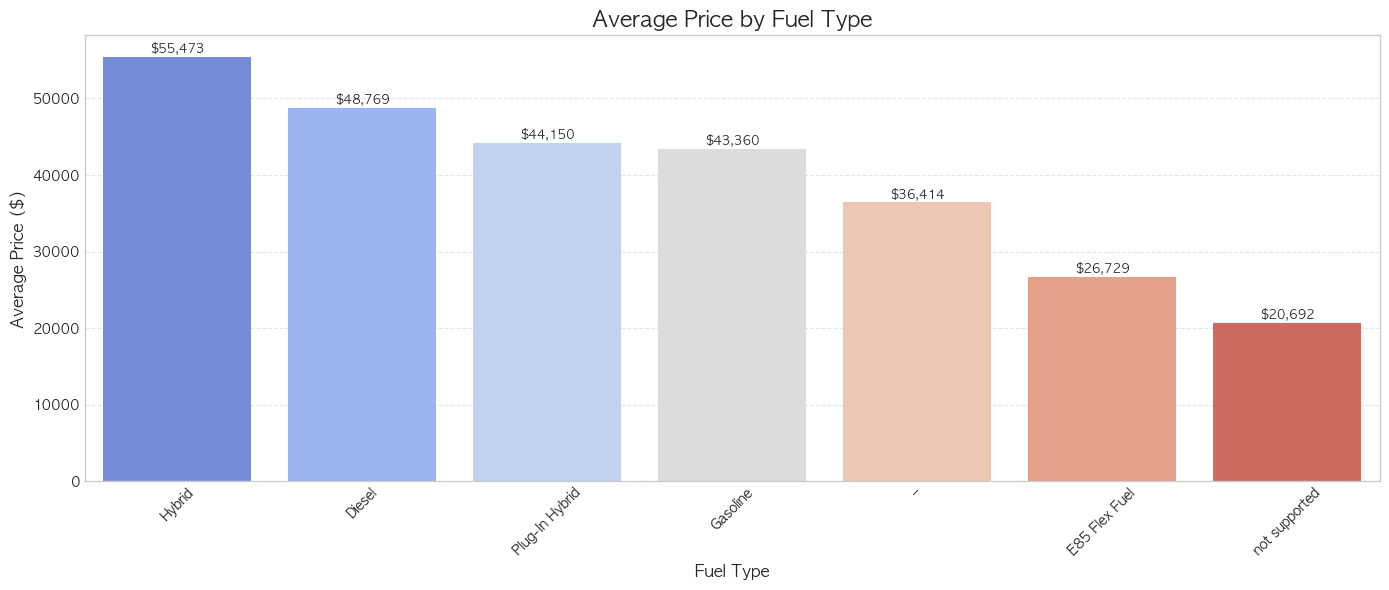

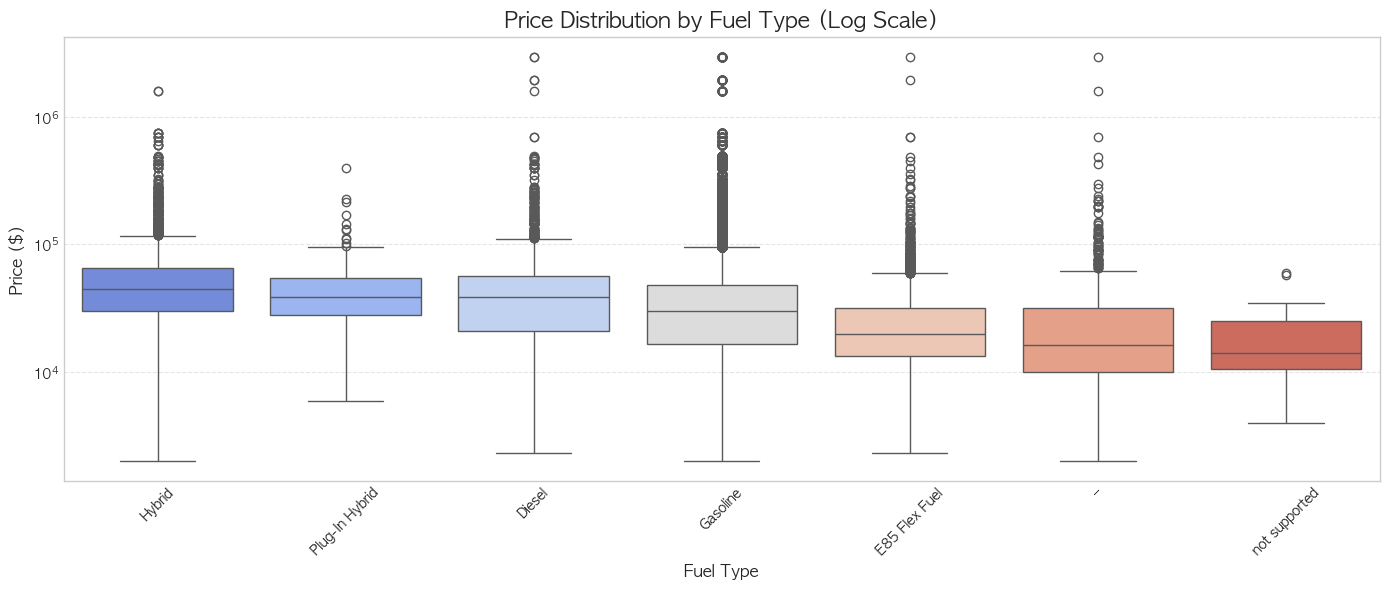

In [18]:
# 결측치 제외한 데이터로 plot (NaN 포함 시 오류 방지)
df_clean_fuel = train.dropna(subset=['fuel_type'])

# 1. Fuel Type별 평균 가격 (Bar Plot)
plt.figure(figsize=(14, 6))
sns.barplot(
    x='fuel_type', y='price', data=df_clean_fuel, 
    estimator=np.mean, errorbar=None, palette='coolwarm', order=df_clean_fuel.groupby('fuel_type')['price'].mean().sort_values(ascending=False).index
)
plt.title('Average Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 가격 값 표시
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 500, 
                   f'${int(height):,}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()


# 2. Fuel Type별 가격 분포 (Boxplot + Log Scale)
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='fuel_type', y='price', data=df_clean_fuel, 
    palette='coolwarm',
    order=df_clean_fuel.groupby('fuel_type')['price'].median().sort_values(ascending=False).index # 중앙값 순 정렬
)
plt.yscale('log') # 가격 차이가 커서 로그 스케일 적용
plt.title('Price Distribution by Fuel Type (Log Scale)', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
# 1. 'Electric' 키워드가 있는 NaN은 'Electric'으로 채우기
df.loc[df['fuel_type'].isna() & df['engine'].str.contains('Electric', case=False, na=False), 'fuel_type'] = 'Electric'

# 2. 'Hybrid' 키워드가 있는 NaN은 'Hybrid'로 채우기
df.loc[df['fuel_type'].isna() & df['engine'].str.contains('Hybrid', case=False, na=False), 'fuel_type'] = 'Hybrid'

# 3. 'Diesel' 키워드가 있는 NaN은 'Diesel'로 채우기
df.loc[df['fuel_type'].isna() & df['engine'].str.contains('Diesel', case=False, na=False), 'fuel_type'] = 'Diesel'

# 4. 나머지는 최빈값(Gasoline)으로 채우기
# (참고: 이상한 값들도 통일)
fuel_mode = df['fuel_type'].mode()[0]
df['fuel_type'] = df['fuel_type'].fillna(fuel_mode)
df['fuel_type'] = df['fuel_type'].replace(['not supported', '–'], fuel_mode)

In [20]:
# 1. 각 연료 타입별 '가격 중위값(Median Price)' 계산
# (예: Electric은 5만불, Gasoline은 3만불...)
fuel_map = train.groupby('fuel_type')['price'].median()

# 2. 계산된 값을 새로운 숫자 컬럼('fuel_type_encoded')으로 만들기
train['fuel_type_encoded'] = train['fuel_type'].map(fuel_map)

# 3. 혹시 모를 결측치(새로운 연료타입 등)는 전체 중간값으로 채우기 (안전장치)
train['fuel_type_encoded'] = train['fuel_type_encoded'].fillna(train['price'].median())

# 4. 잘 바뀌었는지 확인
print("✅ fuel_type 인코딩 완료!")
print(train[['fuel_type', 'fuel_type_encoded']].value_counts().head())

✅ fuel_type 인코딩 완료!
fuel_type      fuel_type_encoded
Gasoline       29999.0              165940
Hybrid         44900.0                6832
E85 Flex Fuel  19900.0                5406
Diesel         38500.0                3955
–              16250.0                 781
Name: count, dtype: int64


### **engine**

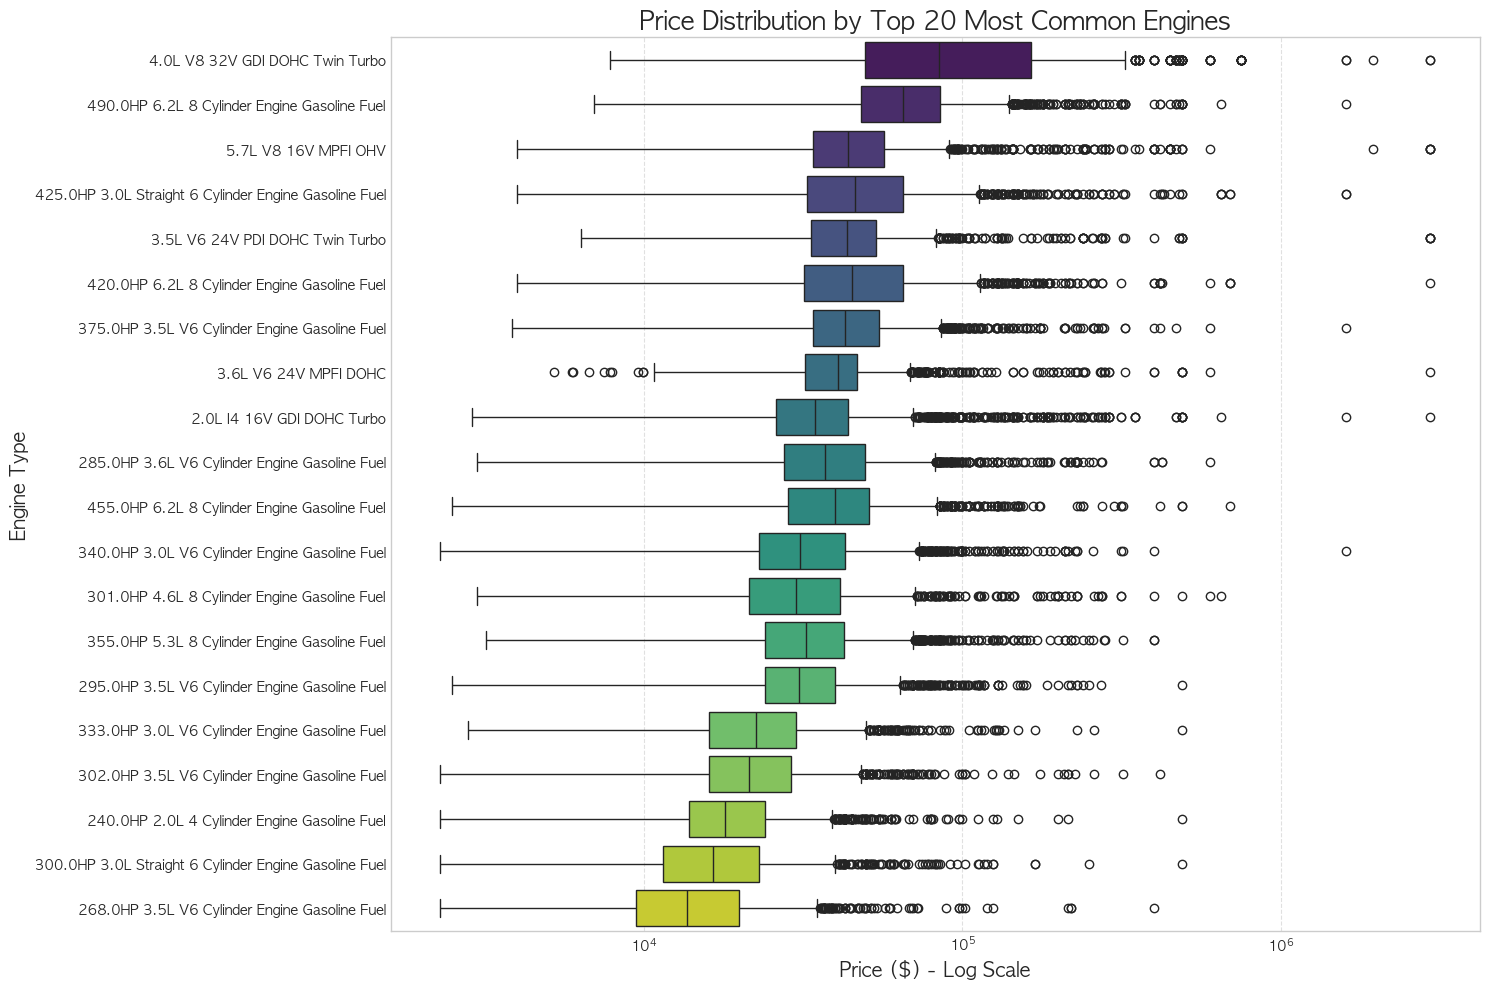

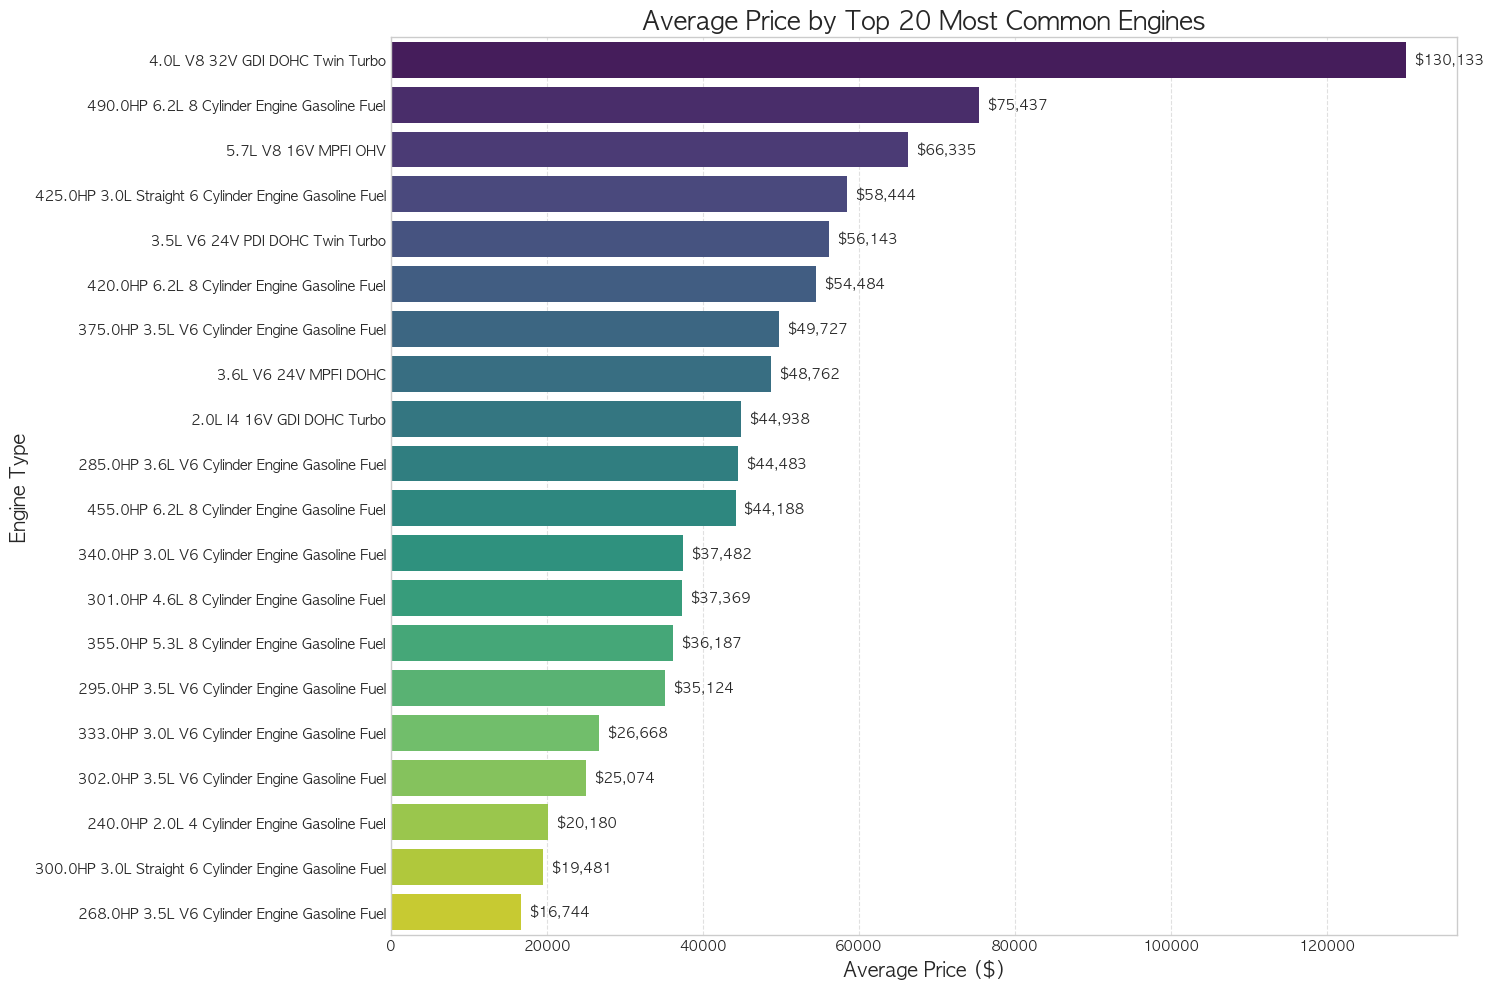

In [21]:
# 가장 많이 등장하는 엔진 종류 상위 20개 추출
top_20_engines = train['engine'].value_counts().head(20).index

# 해당 엔진만 포함하는 데이터프레임 생성
subset_engine = train[train['engine'].isin(top_20_engines)]

# 엔진별 평균 가격 계산하여 정렬
engine_order = subset_engine.groupby('engine')['price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(15, 10))

# 1. 엔진별 편차와 평균을 한눈에 보기 위한 Boxplot Drawing
sns.boxplot(
    y='engine', 
    x='price', 
    data=subset_engine, 
    order=engine_order, 
    palette='viridis'
)

plt.xscale('log') # 가격 범위가 넓으므로 로그 스케일 적용
plt.title('Price Distribution by Top 20 Most Common Engines', fontsize=18)
plt.xlabel('Price ($) - Log Scale', fontsize=14)
plt.ylabel('Engine Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# (선택) 평균 가격 표시를 위한 Bar Plot 추가
plt.figure(figsize=(15, 10))
sns.barplot(
    y='engine', 
    x='price', 
    data=subset_engine, 
    order=engine_order, 
    palette='viridis', 
    errorbar=None
)

plt.title('Average Price by Top 20 Most Common Engines', fontsize=18)
plt.xlabel('Average Price ($)', fontsize=14)
plt.ylabel('Engine Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 막대 끝에 값 표시
for i, p in enumerate(plt.gca().patches):
    width = p.get_width()
    plt.gca().text(width + 1000, p.get_y() + p.get_height() / 2, 
             f'${int(width):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import numpy as np
import re

def preprocess_car_data(df, is_train=True):
    # 원본 보호를 위해 복사
    df = df.copy()
    
    # ---------------------------------------------------------
    # 1. 기본 불필요 컬럼 제거 & 결측치 전략 (Clean Title, Accident)
    # ---------------------------------------------------------
    if 'id' in df.columns:
        df = df.drop('id', axis=1)
        
    # 'No'와 'Unknown'으로 채워서 비싼 차/특수 차 구분하기
    df['clean_title'] = df['clean_title'].fillna('No')
    df['accident'] = df['accident'].fillna('Unknown')
    
    # ---------------------------------------------------------
    # 2. 연식 보정 (2024년 -> 2023년 통합)
    # ---------------------------------------------------------
    df.loc[df['model_year'] == 2024, 'model_year'] = 2023
    
    # 차량 나이 파생변수
    df['car_age'] = 2026 - df['model_year']

    # ---------------------------------------------------------
    # 3. [핵심] 엔진 정보 정밀 추출 (업그레이드 버전!)
    # ---------------------------------------------------------
    # (1) 배기량 (L): "L"과 "Liter" 모두 잡기
    df['liter'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*(?:L|Liter)').astype(float)
    
    # (2) 기통 수: "Cylinder"와 "V6/I4" 패턴 모두 잡기
    cyl_std = df['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)
    cyl_v = df['engine'].str.extract(r'(?:V|I|H|W)(\d+)').astype(float)
    df['cylinder'] = cyl_std.fillna(cyl_v) # 둘 중 하나라도 걸리면 성공
    
    # (3) 마력 (HP): 숫자+HP 추출
    df['hp'] = df['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
    
    # ---------------------------------------------------------
    # 4. 결측치 심폐소생술 (Smart Imputation)
    # ---------------------------------------------------------
    # (1) 전기차는 배기량 0.0으로 설정
    ev_mask = (df['fuel_type'] == 'Electric') | df['engine'].str.contains('Electric', case=False, na=False)
    df.loc[ev_mask, 'liter'] = df.loc[ev_mask, 'liter'].fillna(0.0)
    
    # (2) 마력(HP)이 비어있으면? -> '기통 수'에 맞는 중위값으로 채우기!
    # (주의: 학습용 데이터에서 계산한 map을 테스트에도 써야 정석이지만, 여기선 편의상 각자 계산)
    hp_map = df.groupby('cylinder')['hp'].median().to_dict()
    df['hp'] = df['hp'].fillna(df['cylinder'].map(hp_map))
    
    # 그래도 비어있으면 전체 중위값
    df['hp'] = df['hp'].fillna(df['hp'].median())
    df['liter'] = df['liter'].fillna(df['liter'].median())
    df['cylinder'] = df['cylinder'].fillna(df['cylinder'].median())

    # ---------------------------------------------------------
    # 5. (선택) 변속기 기어 단수 추출
    # ---------------------------------------------------------
    df['gear_count'] = df['transmission'].str.extract(r'(\d+)-Speed').astype(float)
    df['gear_count'] = df['gear_count'].fillna(df['gear_count'].mode()[0])

    return df

### **transmission**

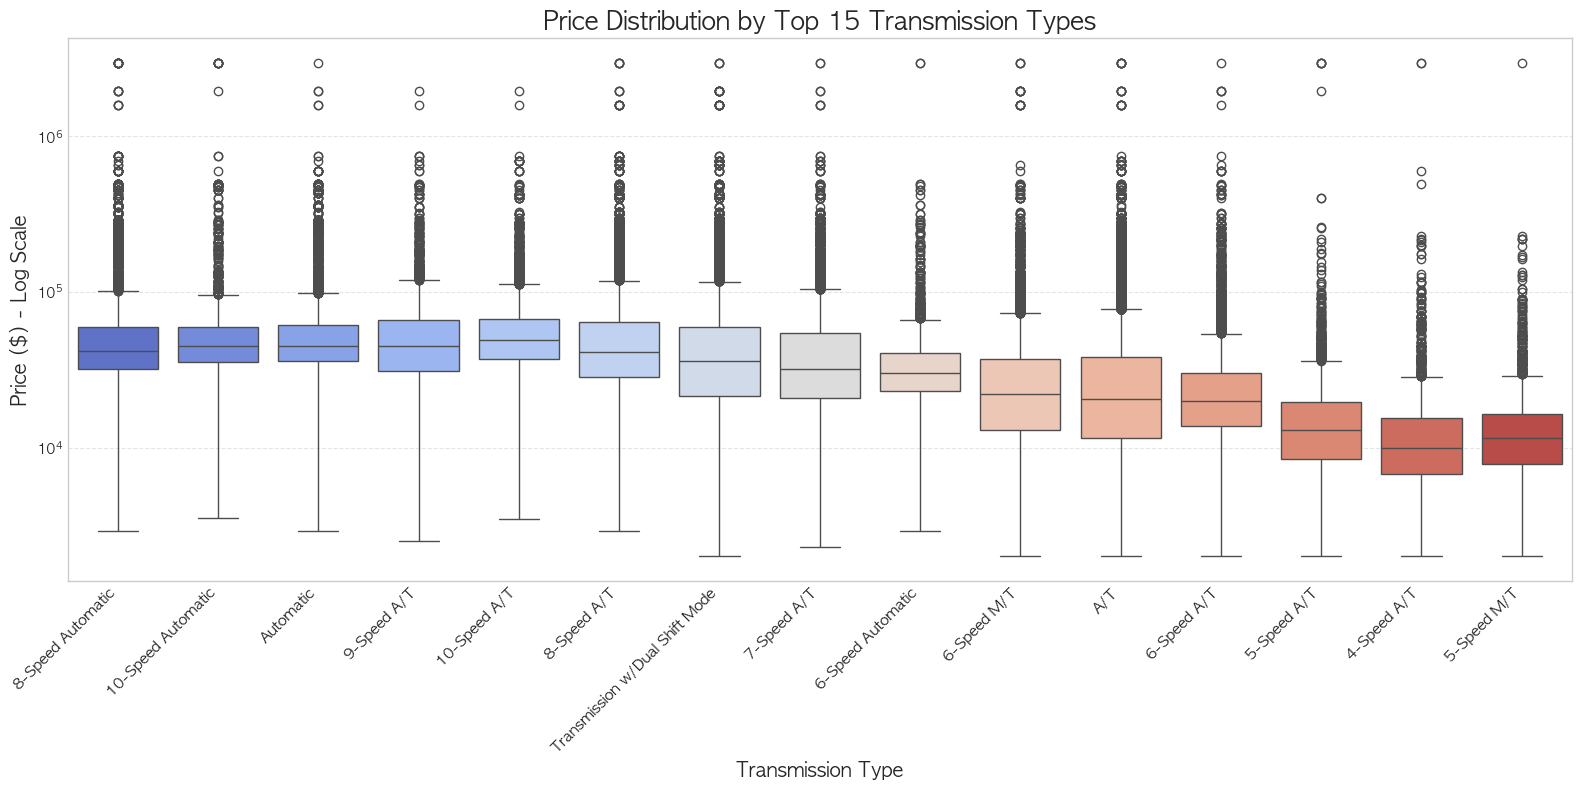

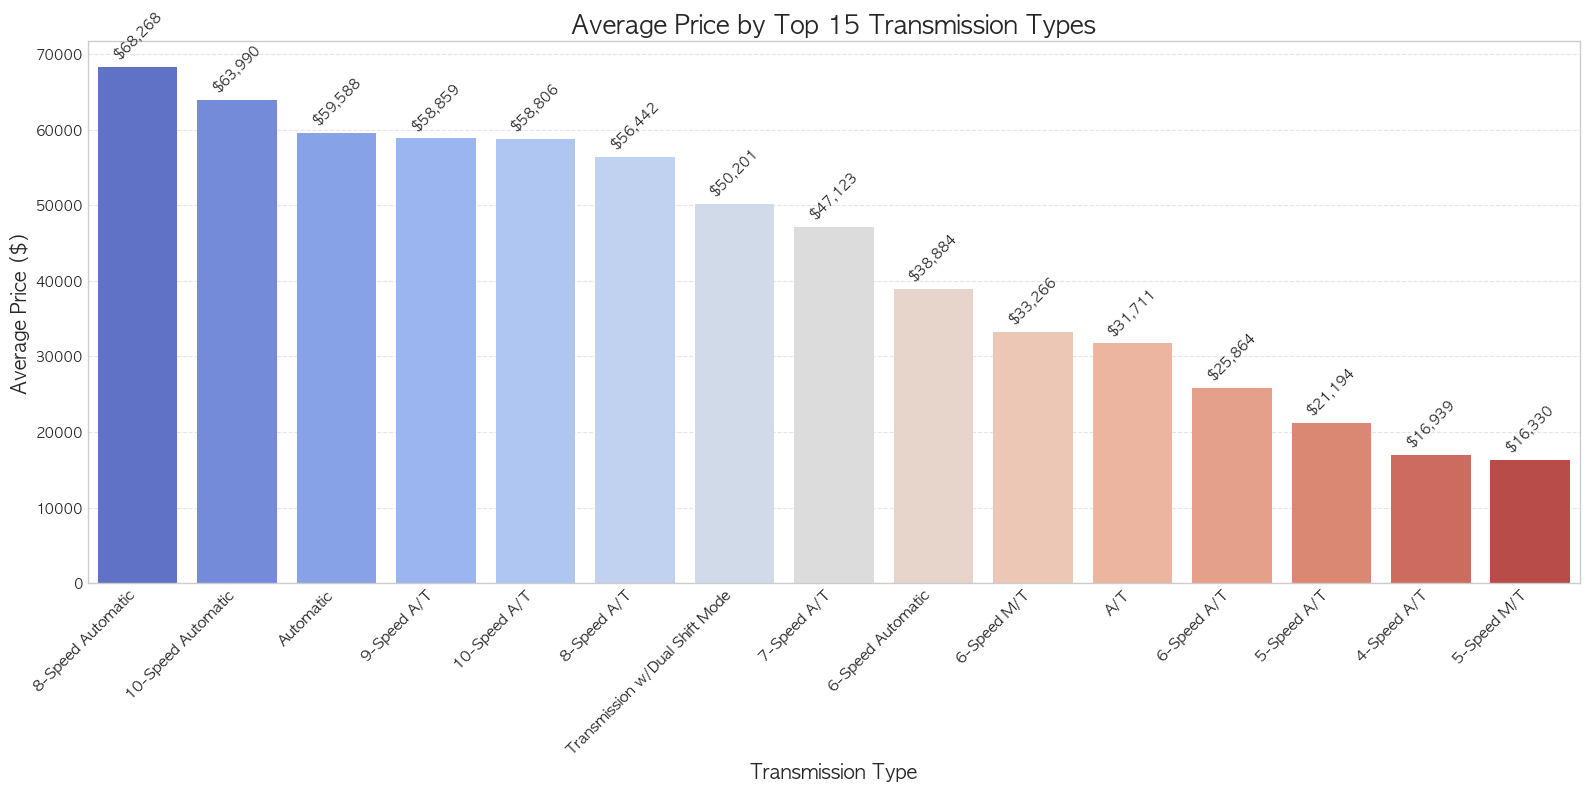

In [23]:
# 가장 많이 등장하는 Transmission 상위 15개 추출
top_15_transmission = train['transmission'].value_counts().head(15).index

# 해당 데이터만 필터링
subset_transmission = train[train['transmission'].isin(top_15_transmission)]

# 평균 가격 기준으로 내림차순 정렬
transmission_order = subset_transmission.groupby('transmission')['price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(16, 8))

# 1. Boxplot (Log Scale) - 가격 분포 확인
sns.boxplot(
    x='transmission', 
    y='price', 
    data=subset_transmission, 
    order=transmission_order, 
    palette='coolwarm'
)

plt.title('Price Distribution by Top 15 Transmission Types', fontsize=18)
plt.ylabel('Price ($) - Log Scale', fontsize=14)
plt.xlabel('Transmission Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yscale('log') # 가격 범위가 넓으므로 로그 스케일 적용
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 2. Bar Plot - 평균 가격 비교
plt.figure(figsize=(16, 8))
sns.barplot(
    x='transmission', 
    y='price', 
    data=subset_transmission, 
    order=transmission_order, 
    palette='coolwarm', 
    errorbar=None
)

plt.title('Average Price by Top 15 Transmission Types', fontsize=18)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xlabel('Transmission Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1000, 
             f'${int(height):,}', ha='center', fontsize=10, rotation=45)

plt.tight_layout()
plt.show()

transmission_simple
Automatic    149455
DCT           19273
Manual        16358
CVT            2834
Other           613
Name: count, dtype: int64


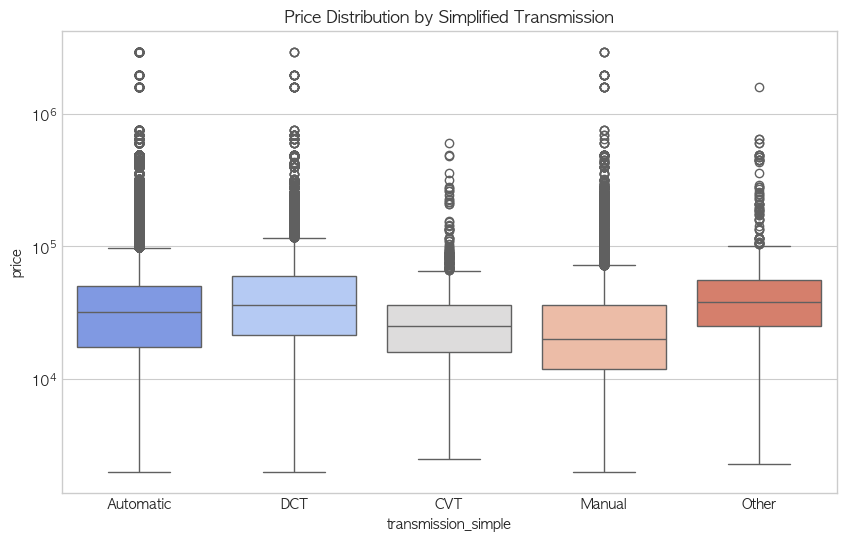

In [24]:
def clean_transmission(x):
    x = str(x).lower()
    if 'cvt' in x:
        return 'CVT'
    elif 'manual' in x or 'm/t' in x:
        return 'Manual'
    elif 'dual shift' in x or 'dct' in x:
        return 'DCT'  # 듀얼 클러치
    elif 'automatic' in x or 'a/t' in x:
        return 'Automatic'
    else:
        return 'Other'

# 새로운 컬럼 생성
train['transmission_simple'] = train['transmission'].apply(clean_transmission)

# 결과 확인
print(train['transmission_simple'].value_counts())

# 시각화로 비교
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission_simple', y='price', data=train, palette='coolwarm')
plt.yscale('log')
plt.title('Price Distribution by Simplified Transmission')
plt.show()

In [25]:
# 1. (사용자님이 짠 코드) 먼저 transmission_simple 만들기
def clean_transmission(x):
    x = str(x).lower()
    if 'cvt' in x:
        return 'CVT'
    elif 'manual' in x or 'm/t' in x:
        return 'Manual'
    elif 'dual shift' in x or 'dct' in x:
        return 'DCT'
    elif 'automatic' in x or 'a/t' in x:
        return 'Automatic'
    else:
        return 'Other'

train['transmission_simple'] = train['transmission'].apply(clean_transmission)

# ---------------------------------------------------------
# 2. [핵심] Target Encoding (가격 중위값으로 변환)
# ---------------------------------------------------------
# 각 변속기 타입별로 중위 가격 계산 (예: DCT는 비싸니까 높은 숫자)
transmission_map = train.groupby('transmission_simple')['price'].median()

# 계산된 값을 새 컬럼에 매핑
train['transmission_encoded'] = train['transmission_simple'].map(transmission_map)

# (혹시 모를 결측치 안전장치)
train['transmission_encoded'] = train['transmission_encoded'].fillna(train['price'].median())

# 3. 확인
print("✅ 변속기 인코딩 완료!")
print(train[['transmission_simple', 'transmission_encoded']].value_counts().head())

✅ 변속기 인코딩 완료!
transmission_simple  transmission_encoded
Automatic            31750.0                 149455
DCT                  35999.0                  19273
Manual               19995.0                  16358
CVT                  24950.0                   2834
Other                37999.0                    613
Name: count, dtype: int64


### **ext_col, int_col**

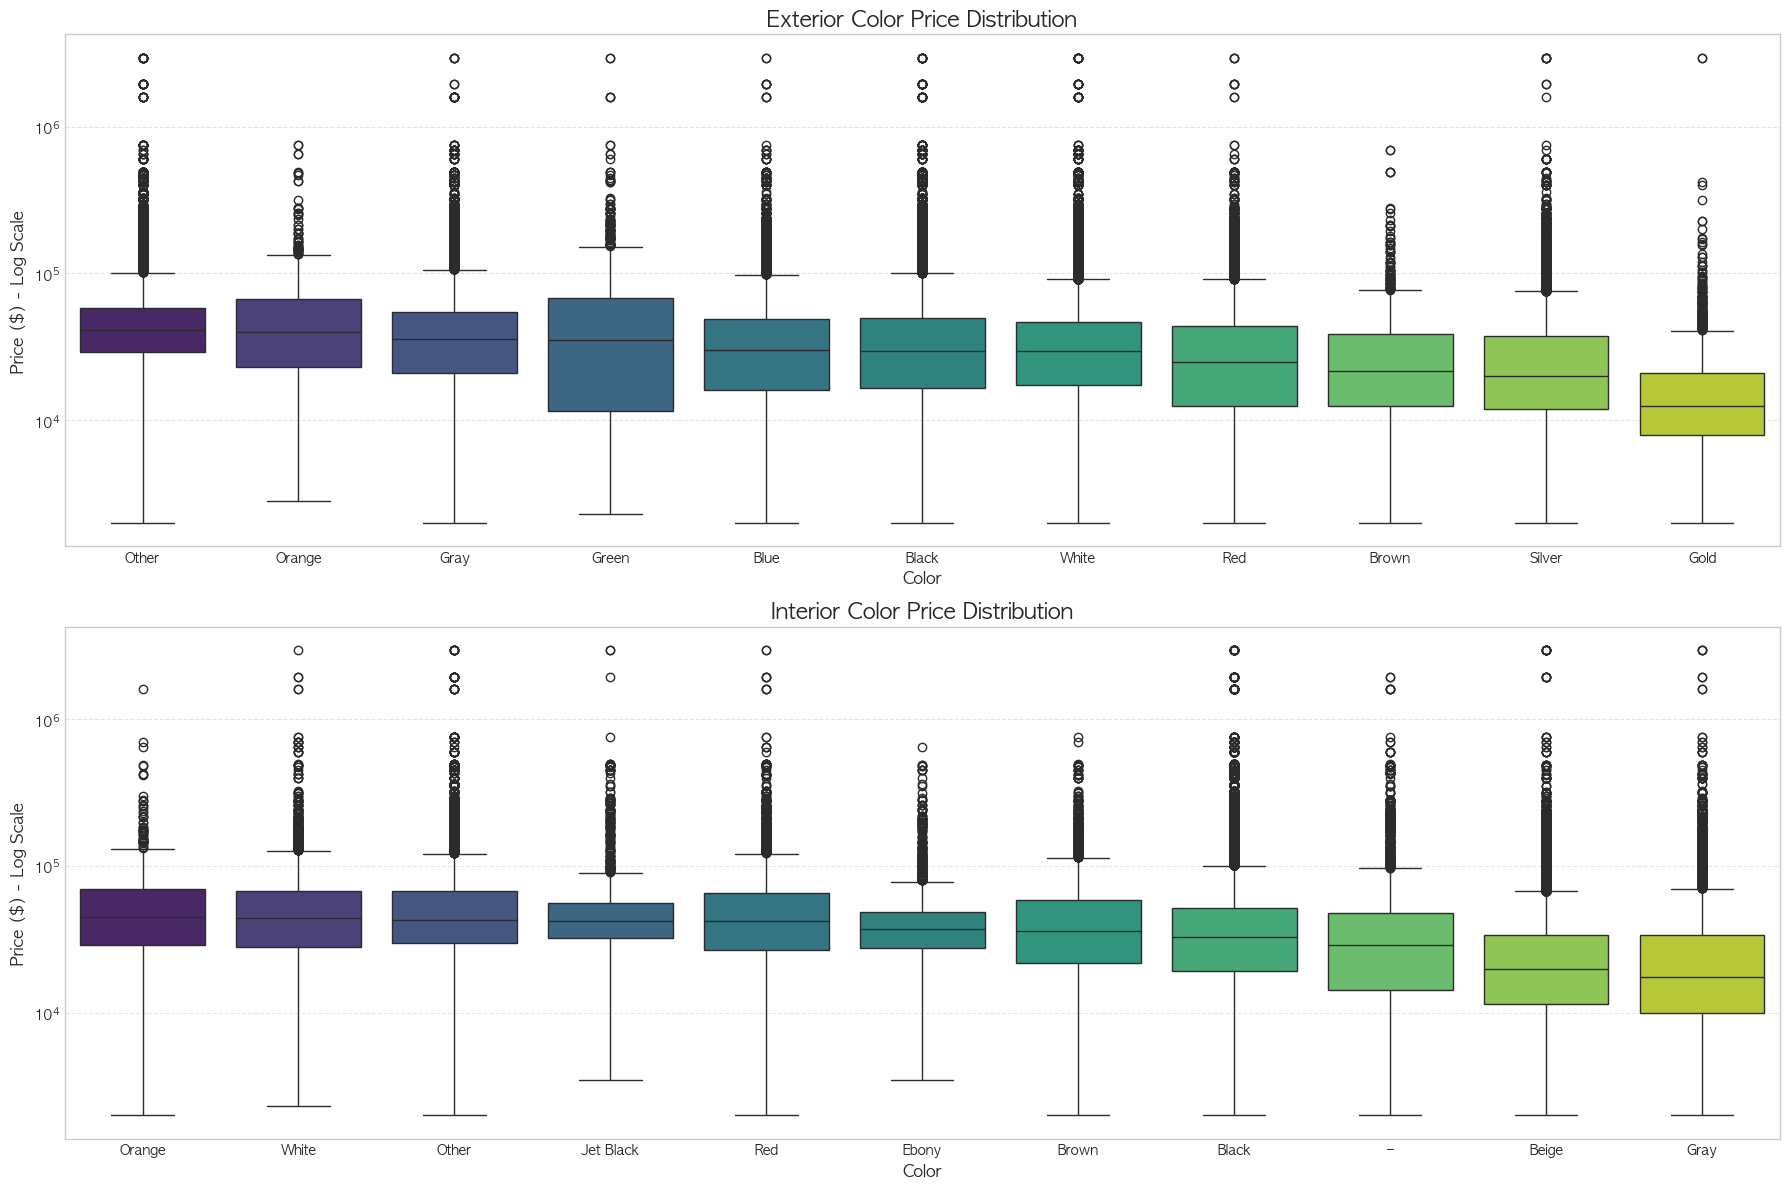


[ Exterior Color Counts ]
ext_col_categorized
Black     48658
White     43815
Gray      25293
Other     22649
Silver    16995
Blue      14555
Red        9901
Green      2698
Gold       1668
Brown      1162
Orange     1139
Name: count, dtype: int64

[ Interior Color Counts ]
int_col_categorized
Black        107674
Beige         24495
Gray          21204
Other          9772
Brown          5810
Red            5145
White          4743
–              4527
Jet Black      2398
Ebony          1833
Orange          932
Name: count, dtype: int64


In [26]:
# 함수 정의: Top 10 외에는 'Other'로 변경
def categorize_top_n(series, n=10, other_label='Other'):
    top_n = series.value_counts().head(n).index
    return series.apply(lambda x: x if x in top_n else other_label)

# 1. ext_col (외장 색상) 처리
train['ext_col_categorized'] = categorize_top_n(train['ext_col'], n=10)

# 2. int_col (내장 색상) 처리
train['int_col_categorized'] = categorize_top_n(train['int_col'], n=10)

# 시각화할 컬럼 리스트
color_cols = ['ext_col_categorized', 'int_col_categorized']
titles = ['Exterior Color Price Distribution', 'Interior Color Price Distribution']

plt.figure(figsize=(18, 12))

for i, col in enumerate(color_cols):
    plt.subplot(2, 1, i + 1)
    
    # 평균 가격 순으로 정렬
    order = train.groupby(col)['price'].median().sort_values(ascending=False).index
    
    sns.boxplot(x=col, y='price', data=train, order=order, palette='viridis')
    
    plt.title(titles[i], fontsize=16)
    plt.xlabel('Color', fontsize=12)
    plt.ylabel('Price ($) - Log Scale', fontsize=12)
    plt.yscale('log') # 가격 범위가 넓으므로 로그 스케일 적용
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# (참고) 각 색상별 개수 출력
print("\n[ Exterior Color Counts ]")
print(train['ext_col_categorized'].value_counts())
print("\n[ Interior Color Counts ]")
print(train['int_col_categorized'].value_counts())

In [27]:
# 1. (사용자님의 함수) Top 10 외에는 'Other'로 묶기
def categorize_top_n(series, n=10, other_label='Other'):
    top_n = series.value_counts().head(n).index
    return series.apply(lambda x: x if x in top_n else other_label)

# 2. 색상 컬럼 단순화 (Categorization)
train['ext_col_simple'] = categorize_top_n(train['ext_col'], n=10)
train['int_col_simple'] = categorize_top_n(train['int_col'], n=10)

# ---------------------------------------------------------
# 3. [핵심] Target Encoding (가격 중위값으로 변환)
# ---------------------------------------------------------
# (1) 외장 색상 (Exterior) 인코딩
ext_map = train.groupby('ext_col_simple')['price'].median()
train['ext_col_encoded'] = train['ext_col_simple'].map(ext_map)

# (2) 내장 색상 (Interior) 인코딩
int_map = train.groupby('int_col_simple')['price'].median()
train['int_col_encoded'] = train['int_col_simple'].map(int_map)

# (3) 결측치 안전장치
train['ext_col_encoded'] = train['ext_col_encoded'].fillna(train['price'].median())
train['int_col_encoded'] = train['int_col_encoded'].fillna(train['price'].median())

# 4. 결과 확인
print("✅ 색상 인코딩 완료!")
print(train[['ext_col_simple', 'ext_col_encoded']].value_counts().head())
print(train[['int_col_simple', 'int_col_encoded']].value_counts().head())

✅ 색상 인코딩 완료!
ext_col_simple  ext_col_encoded
Black           29500.0            48658
White           29500.0            43815
Gray            35645.0            25293
Other           40998.0            22649
Silver          20000.0            16995
Name: count, dtype: int64
int_col_simple  int_col_encoded
Black           33000.0            107674
Beige           19780.0             24495
Gray            17500.0             21204
Other           42995.0              9772
Brown           35999.0              5810
Name: count, dtype: int64


### **clean_title**

In [28]:
# 결측치를 'No'라는 문자열로 채웁니다.
train['clean_title'] = train['clean_title'].fillna('No')
test['clean_title'] = test['clean_title'].fillna('No') # 테스트 데이터도 똑같이!

### **accident_filled**

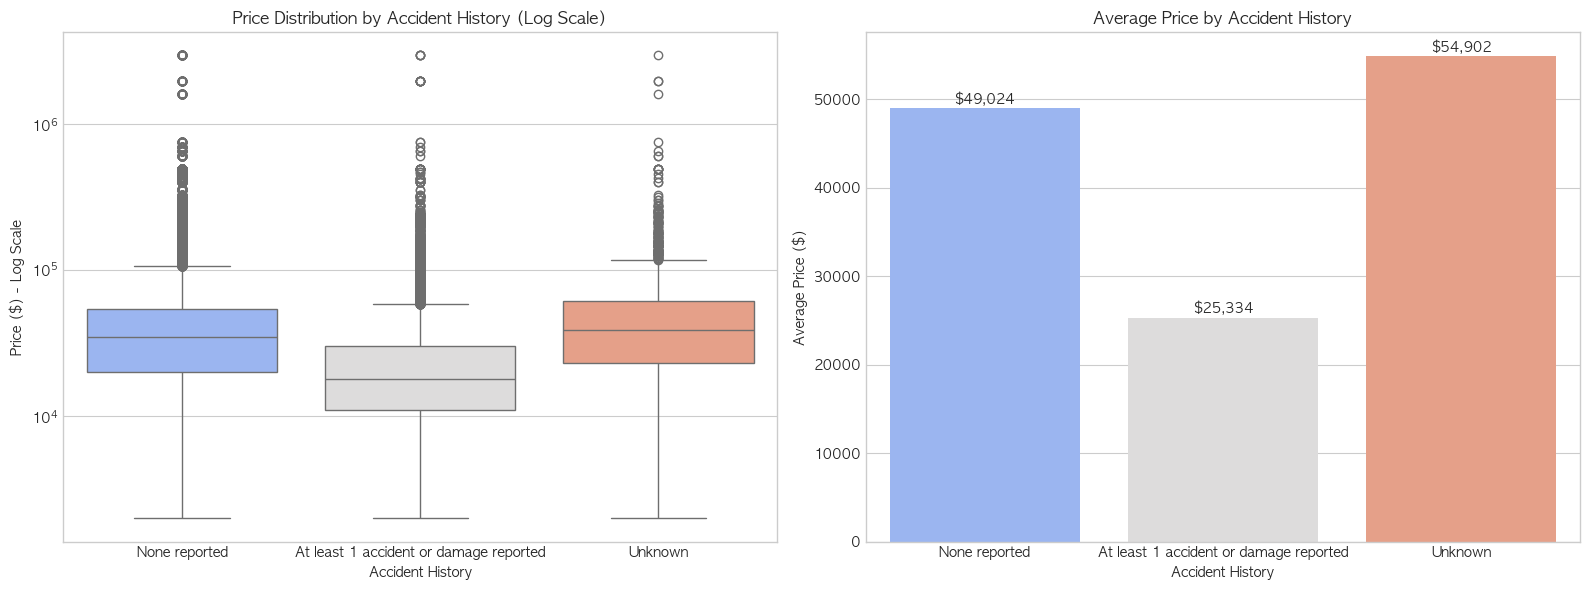

In [29]:
# 결측치 처리 (NaN -> 'Unknown')
train['accident_filled'] = train['accident'].fillna('Unknown')

# 사고 이력별 가격 비교 시각화
plt.figure(figsize=(16, 6))

# 1. Boxplot (Log Scale) - 가격 분포 비교
plt.subplot(1, 2, 1)
sns.boxplot(x='accident_filled', y='price', data=train, palette='coolwarm')
plt.title('Price Distribution by Accident History (Log Scale)')
plt.ylabel('Price ($) - Log Scale')
plt.xlabel('Accident History')
plt.yscale('log') # 가격 차이가 클 수 있으므로 로그 스케일 적용

# 2. Barplot - 평균 가격 비교
plt.subplot(1, 2, 2)
sns.barplot(x='accident_filled', y='price', data=train, estimator=np.mean, errorbar=None, palette='coolwarm')
plt.title('Average Price by Accident History')
plt.ylabel('Average Price ($)')
plt.xlabel('Accident History')

# 평균 가격 텍스트 표시
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 500, 
             f'${int(height):,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### **model year**

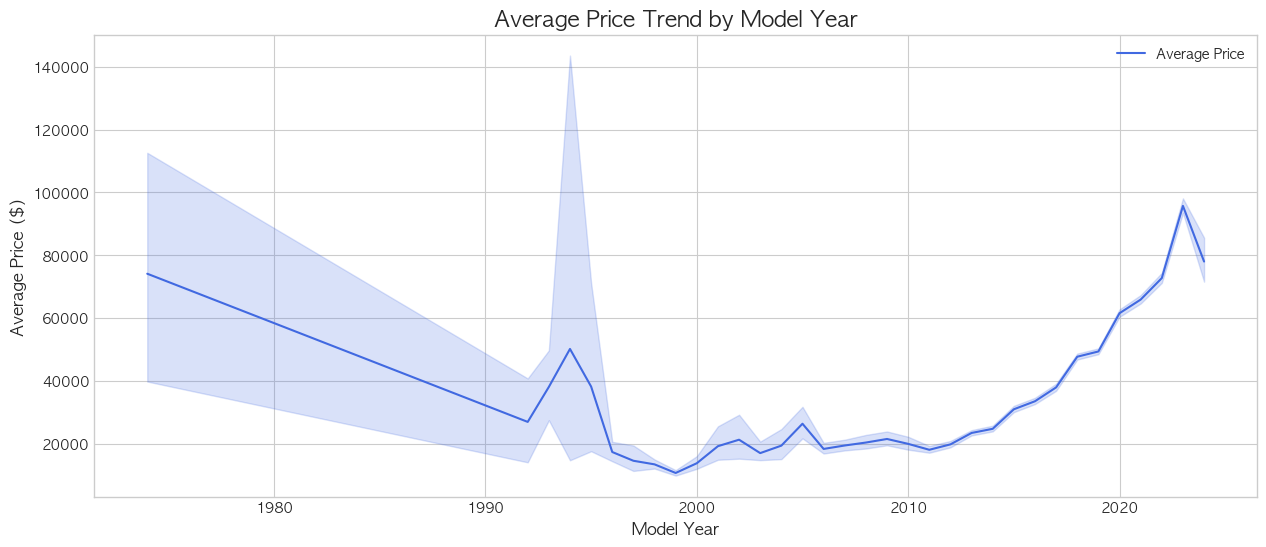

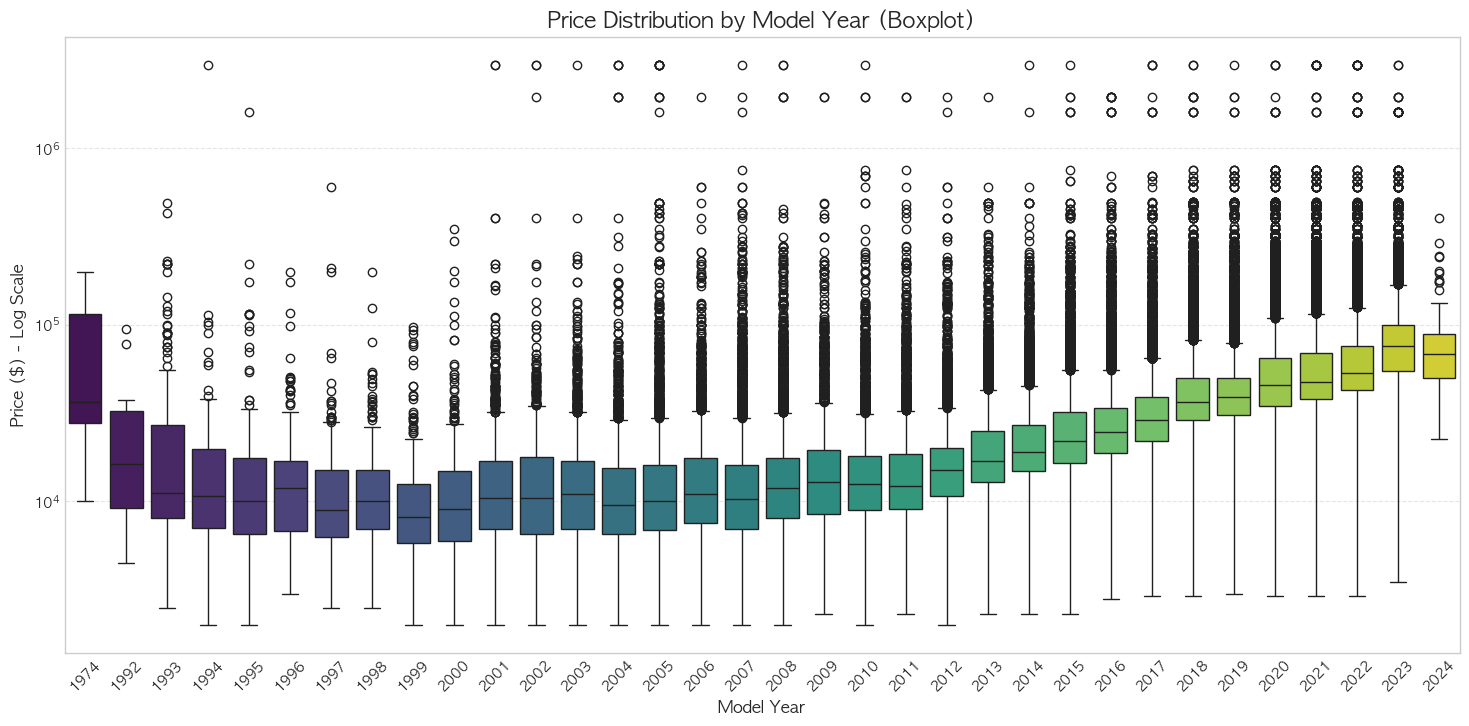

In [30]:
plt.figure(figsize=(15, 6))

# 1. Line Plot (Price Trend by Year) - 연식별 평균 가격 추세
sns.lineplot(x='model_year', y='price', data=train, color='royalblue', label='Average Price')
plt.title('Average Price Trend by Model Year', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Model Year', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# 2. Boxplot (Price Distribution by Year) - 연도별 가격 분포 확인
plt.figure(figsize=(18, 8))
sns.boxplot(x='model_year', y='price', data=train, palette='viridis')
plt.title('Price Distribution by Model Year (Boxplot)', fontsize=16)
plt.ylabel('Price ($) - Log Scale', fontsize=12) # 가격차가 커서 로그 변환 적용
plt.xlabel('Model Year', fontsize=12)
plt.yscale('log') # Y축 로그 스케일 적용
plt.xticks(rotation=45) # 연도가 겹치지 않게 회전
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [31]:
# 1. 차량 나이 (올해 - 연식)
train['car_age'] = 2026 - train['model_year']
test['car_age'] = 2026 - test['model_year']

# 2. 연간 주행거리 (혹사 점수)
# 0으로 나누는 에러 방지를 위해 car_age가 0이면 1로 살짝 보정
train['miles_per_year'] = train['milage'] / train['car_age'].replace(0, 1)
test['miles_per_year'] = test['milage'] / test['car_age'].replace(0, 1)

### **가격 이상치 제거**

🚨 이상치 커트라인 (상위 0.1%): $749,950 이상

=== [경고] 삭제 대상 이상치 목록 (총 148개) ===
                brand                                              model  \
220              Ford                                          F-150 XLT   
67957            Land  Rover Range Rover 5.0L Supercharged Autobiogra...   
43218           Tesla                                 Model 3 Long Range   
46159       Chevrolet                                           Tahoe LT   
1880         Chrysler                                          300C Base   
129013  Mercedes-Benz                            SL-Class SL600 Roadster   
128002            RAM                                       1500 Laramie   
49575             RAM                                       1500 Laramie   
55428           Lexus                                        LS 430 Base   
55493           Lexus                                        LS 430 Base   

        model_year    price  
220           2021  2954083  
67957         2017  2954083  
432

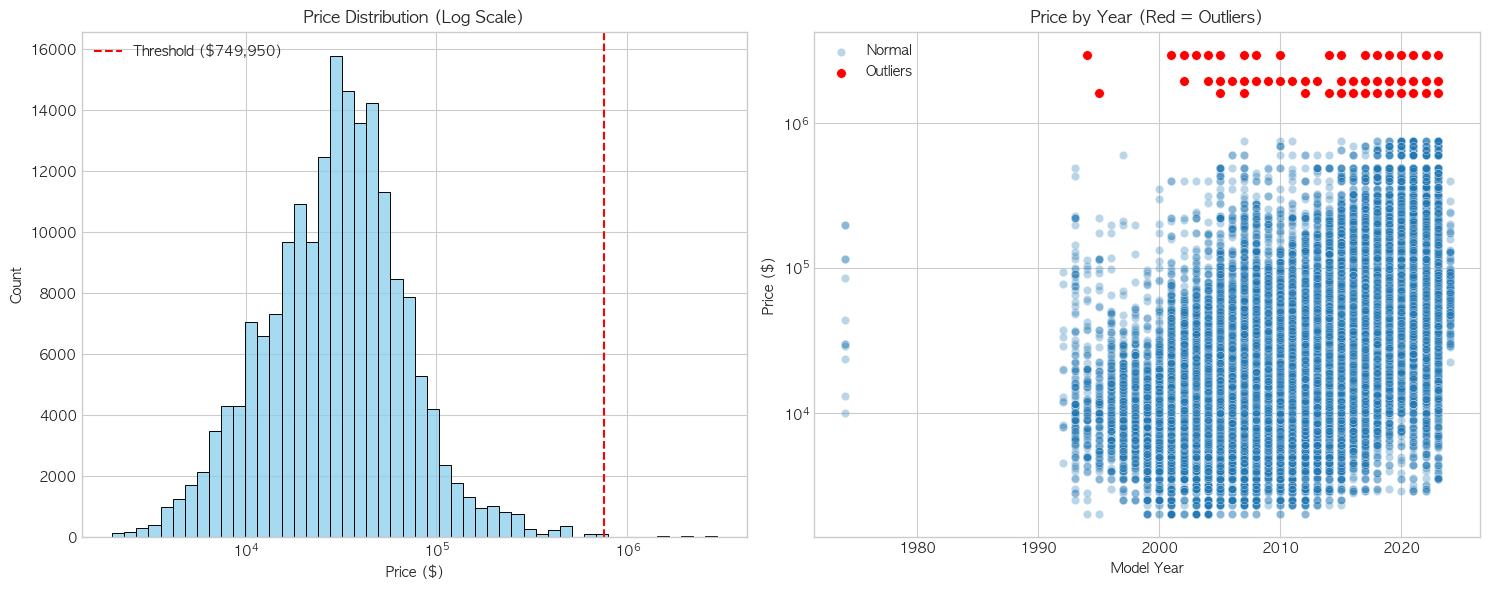


=== [참고] 이상치 제거 시 예상되는 데이터 분포 ===
count    188385.000000
mean      42208.796396
std       49036.637540
min        2000.000000
25%       17000.000000
50%       30775.000000
75%       49883.000000
max      749950.000000
Name: price, dtype: float64


In [32]:
# 2. 이상치 기준 설정 (상위 0.1%)
threshold = train['price'].quantile(0.999)
print(f"🚨 이상치 커트라인 (상위 0.1%): ${threshold:,.0f} 이상")

# 3. 이상치 데이터 추출 (표로 확인하기 위함)
outliers = train[train['price'] > threshold].sort_values('price', ascending=False)

print(f"\n=== [경고] 삭제 대상 이상치 목록 (총 {len(outliers)}개) ===")
# 가독성을 위해 주요 컬럼만 출력
print(outliers[['brand', 'model', 'model_year', 'price']].head(10))

# 4. 시각화 (한눈에 확인하기)
plt.figure(figsize=(15, 6))

# (1) 가격 분포 히스토그램 (로그 스케일)
plt.subplot(1, 2, 1)
sns.histplot(train['price'], bins=50, log_scale=True, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold (${threshold:,.0f})')
plt.title('Price Distribution (Log Scale)')
plt.xlabel('Price ($)')
plt.legend()

# (2) 연식별 가격 산점도 (이상치가 얼마나 튀는지 확인)
plt.subplot(1, 2, 2)
sns.scatterplot(x='model_year', y='price', data=train, alpha=0.3, label='Normal')
# 이상치만 빨간색으로 표시
sns.scatterplot(x='model_year', y='price', data=outliers, color='red', s=50, label='Outliers')
plt.yscale('log') # 로그 스케일로 봐야 잘 보임
plt.title('Price by Year (Red = Outliers)')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.legend()

plt.tight_layout()
plt.show() # 그래프 출력

# 5. (선택) 이상치 제거 후 데이터 분포 확인
print("\n=== [참고] 이상치 제거 시 예상되는 데이터 분포 ===")
clean_data = train[train['price'] <= threshold]
print(clean_data['price'].describe())

### **중복 데이터 제거**

In [33]:
# 2. 가짜 부자 데이터 다시 추출
threshold = train['price'].quantile(0.999)
all_outliers = train[train['price'] >= threshold]
supercar_brands = ['Bugatti', 'Ferrari', 'Lamborghini', 'Rolls-Royce', 'McLaren', 'Bentley', 'Aston', 'Maybach','Porsche']
fake_rich_cars = all_outliers[~all_outliers['brand'].isin(supercar_brands)]

# 3. 가격별 개수 세기 (Top 10)
price_counts = fake_rich_cars['price'].value_counts().reset_index()
price_counts.columns = ['Price ($)', 'Count']

# 4. 각 가격별 대표 차종(Brand + Model) 예시 추가
examples = []
for price in price_counts['Price ($)']:
    # 해당 가격을 가진 차들의 브랜드+모델 리스트 추출 (중복 제거, 상위 3개만)
    sample_cars = fake_rich_cars[fake_rich_cars['price'] == price]
    car_list = (sample_cars['brand'] + " " + sample_cars['model']).unique()[:3]
    examples.append(", ".join(car_list))

price_counts['Examples (Top 3)'] = examples

# 5. 보기 좋게 출력
print(f"=== [충격] 삭제된 가짜 가격표 TOP {len(price_counts)} ===")
# 천 단위 콤마 포맷팅 적용해서 보여주기
pd.options.display.float_format = '{:,.0f}'.format
print(price_counts)

=== [충격] 삭제된 가짜 가격표 TOP 4 ===
   Price ($)  Count                                   Examples (Top 3)
0    2954083     48  Ford F-150 XLT, Chrysler 300C Base, Toyota Hig...
1     749950     29  Audi R8 5.2 V10 performance, Mercedes-Benz C-C...
2    1599000     27  Land Rover Range Rover Sport HSE, BMW M4 Base,...
3    1950995     22  Mercedes-Benz AMG GLS 63 4MATIC, BMW M3 CS, Ch...


### **가짜 부자 삭제**

In [34]:
# 1. 슈퍼카 브랜드 리스트 정의 (이 브랜드들은 비싸도 봐줌)
supercar_brands = ['Bugatti', 'Ferrari', 'Lamborghini', 'Rolls-Royce', 'McLaren', 'Bentley', 'Aston', 'Maybach','Porsche']

# 2. 이상치 제거 조건 설정
# (1) 가격이 70만 불($700,000) 이상이면서
# (2) 슈퍼카 브랜드가 아닌 경우 -> "너, 가짜지?" 하고 삭제
fake_rich_mask = (train['price'] > 700000) & (~train['brand'].isin(supercar_brands))

# 3. 진짜 이상치만 골라내서 삭제
train_smart_clean = train[~fake_rich_mask].copy()

# 4. 결과 확인
deleted_count = fake_rich_mask.sum()
print(f"🕵️‍♂️ 스마트 필터링 결과: 총 {deleted_count}개의 '가짜 부자' 데이터만 삭제했습니다!")
print(f"남은 데이터 개수: {len(train_smart_clean)}")

# 삭제된 놈들 구경하기 (현대, 포드 등이 잡혀있어야 함)
print("\n=== [삭제된 가짜 데이터 예시] ===")
print(train[fake_rich_mask][['brand', 'model', 'price']].head())

🕵️‍♂️ 스마트 필터링 결과: 총 126개의 '가짜 부자' 데이터만 삭제했습니다!
남은 데이터 개수: 188407

=== [삭제된 가짜 데이터 예시] ===
               brand                   model    price
220             Ford               F-150 XLT  2954083
1880        Chrysler               300C Base  2954083
5715            Audi  R8 5.2 V10 performance   749950
10173  Mercedes-Benz       AMG GLS 63 4MATIC  1950995
13838         Toyota           Highlander SE  2954083


In [35]:
# ---------------------------------------------------------
# Case 1: "최신 차가 왜 이렇게 싸?" (2020년 이후, $10,000 미만)
# ---------------------------------------------------------
suspicious_new_cars = train[
    (train['model_year'] >= 2020) & 
    (train['price'] < 10000)
].sort_values('price')

print(f"=== [의심] 2020년 이후인데 $10,000 미만인 차: {len(suspicious_new_cars)}대 ===")
print(suspicious_new_cars[['brand', 'model', 'model_year', 'price']].head(10))


# ---------------------------------------------------------
# Case 2: "슈퍼카가 아반떼 가격?" (슈퍼카 브랜드, $30,000 미만)
# ---------------------------------------------------------
supercar_brands = ['Bugatti', 'Ferrari', 'Lamborghini', 'Rolls-Royce', 'McLaren', 'Bentley', 'Aston', 'Maybach']

suspicious_supercars = train[
    (train['brand'].isin(supercar_brands)) & 
    (train['price'] < 30000) # 3만불 미만이면 의심
].sort_values('price')

print(f"\n=== [의심] 슈퍼카 브랜드인데 $30,000 미만인 차: {len(suspicious_supercars)}대 ===")
print(suspicious_supercars[['brand', 'model', 'model_year', 'price']].head(10))


# ---------------------------------------------------------
# Case 3: 전체 최저가 TOP 10 구경하기 (너무 싼 차 식별용)
# ---------------------------------------------------------
print("\n=== [참고] 데이터셋 전체 최저가 TOP 10 ===")
print(train.sort_values('price')[['brand', 'model', 'model_year', 'price']].head(10))


# =========================================================
# 🚨 [추가된 코드] 확인만 하지 말고 진짜 삭제하자!
# =========================================================

# 1. 삭제할 데이터들의 '주민번호(Index)'를 모두 모읍니다.
# (위에서 찾은 '최신 똥차' + '가짜 슈퍼카')
drop_indices = suspicious_new_cars.index.union(suspicious_supercars.index)

# 2. (추가) 그냥 가격이 너무 싼 차($2,000 미만)도 삭제 대상에 포함
# (폐차 수준이라 학습에 방해됨)
trash_indices = train[train['price'] < 3000].index
drop_indices = drop_indices.union(trash_indices)

# 3. 실제 삭제 실행
print(f"\n🔪 삭제 실행 전 데이터 개수: {len(train)}개")
print(f"🚨 삭제 대상 개수: {len(drop_indices)}개")

train = train.drop(drop_indices)
train = train.reset_index(drop=True) # 인덱스 깔끔하게 정리

print(f"✅ 삭제 완료! 남은 데이터 개수: {len(train)}개")

=== [의심] 2020년 이후인데 $10,000 미만인 차: 181대 ===
                brand                       model  model_year  price
68888           Mazda                CX-30 Select        2021   2899
126406  Mercedes-Benz        C-Class C 300 4MATIC        2021   2899
66738             Kia                       K5 EX        2021   2899
131896           Ford       Bronco Sport Big Bend        2022   2899
111346      Chevrolet                     Trax LS        2020   2900
49070          Subaru        Impreza 2.0i Premium        2022   2900
134638           Jeep           Gladiator Rubicon        2022   2990
85220            Ford                   Escape SE        2022   3000
149867         Subaru  Ascent Touring 7-Passenger        2021   3000
48620           Mazda                CX-30 Select        2021   3200

=== [의심] 슈퍼카 브랜드인데 $30,000 미만인 차: 499대 ===
              brand                    model  model_year  price
163248      Bentley      Continental GT Base        2007   2300
78754         Aston  Mart

In [36]:
# 1. 고급차 브랜드 리스트 정의
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche', 'Land', 'Jaguar', 'Bentley', 'Maserati','Ferrari','Lamborghini']

# 2. [조건] 
# (1) 고급차인데 
# (2) 2010년 이후 연식이고 
# (3) 가격이 $5,000 미만인데
# (4) 주행거리가 10만 마일(약 16만 km) 미만이다? 
# -> "이건 말도 안 돼! 낚시다!" (조건식)
fake_luxury_mask = (
    train['brand'].isin(luxury_brands) & 
    (train['model_year'] >= 2010) & 
    (train['price'] < 5000) &
    (train['milage'] < 100000) # 주행거리 조건 추가!
)

# 3. 삭제 대상 확인 (삭제 전에 눈으로 꼭 확인!)
suspicious_cars = train[fake_luxury_mask]
print(f"🕵️‍♂️ [정밀 타격] 상태는 좋은데 가격이 말이 안 되는 차: {len(suspicious_cars)}대")

# 어떤 놈들인지 구경하기 (마일리지가 적은 순서대로)
print(suspicious_cars[['brand', 'model', 'model_year', 'price', 'milage']].sort_values('milage').head(10))

# 4. (확인 후) 삭제 실행
# 기존 train 변수에 덮어쓰기
train = train[~fake_luxury_mask].copy()
print(f"✅ 총 {len(suspicious_cars)}개의 낚시 매물을 삭제했습니다!")

🕵️‍♂️ [정밀 타격] 상태는 좋은데 가격이 말이 안 되는 차: 83대
                brand                       model  model_year  price  milage
185697        Porsche                 Cayman Base        2012   3200    6600
19961   Mercedes-Benz    GLA-Class GLA 250 4MATIC        2015   4750   11249
92432            Audi                     A8 L 55        2012   4900   16000
108439           Land  Rover Discovery HSE LUXURY        2013   4000   17340
131352          Lexus                 GX 460 Base        2011   3999   17500
75637            Audi            Q8 3.0T Prestige        2014   4199   19900
167993  Mercedes-Benz        S-Class S 550 4MATIC        2013   4900   20220
115505  Mercedes-Benz  C-Class C 300 4MATIC Sport        2012   3950   20220
106474  Mercedes-Benz  C-Class C 300 4MATIC Sport        2011   3500   20623
40014   Mercedes-Benz        C-Class C 300 4MATIC        2011   3950   28260
✅ 총 83개의 낚시 매물을 삭제했습니다!


In [37]:
# ---------------------------------------------------------
# 2. [핵심] 과감한 삭제 (쓰레기 6,300개 즉결 처형)
# ---------------------------------------------------------
# (1) 400만원 미만 똥차/낚시매물 삭제
mask_junk = train['price'] < 4000

# (2) 3000만원 미만 슈퍼카(사기) 삭제
luxury_brands = ['Lamborghini', 'Ferrari', 'McLaren', 'Rolls-Royce', 'Bentley', 'Aston', 'Porsche', 'Maserati']
mask_luxury_scam = (train['brand'].isin(luxury_brands)) & (train['price'] < 30000)

# (3) 10억원 이상 오류 데이터 삭제
mask_super_high = train['price'] > 1000000

# (4) 2억원 이상 일반차(오류) 삭제
common_brands = ['Ford', 'Toyota', 'Honda', 'Hyundai', 'Kia', 'Chevrolet', 'Nissan', 'Volkswagen']
mask_common_error = (train['brand'].isin(common_brands)) & (train['price'] > 200000)

# 삭제 실행
drop_mask = mask_junk | mask_luxury_scam | mask_super_high | mask_common_error
train = train[~drop_mask].reset_index(drop=True)

print(f"🧹 청소 완료! 삭제된 개수: {drop_mask.sum()}개")
print(f"✨ 남은 정예 데이터: {len(train)}개 (이제 모델이 건강해졌습니다!)")

🧹 청소 완료! 삭제된 개수: 5330개
✨ 남은 정예 데이터: 182016개 (이제 모델이 건강해졌습니다!)


In [38]:
# 1990년 이전을 'Classic'으로 정의
train['is_classic'] = (train['model_year'] < 1990).astype(int)
test['is_classic'] = (test['model_year'] < 1990).astype(int)

In [39]:
# 2024년 데이터를 2023년으로 통합하는 코드
# (Train과 Test 모두 적용해야 합니다!)

# 1. Train 데이터 수정
train.loc[train['model_year'] == 2024, 'model_year'] = 2023

# 2. Test 데이터 수정
test.loc[test['model_year'] == 2024, 'model_year'] = 2023

print("✅ 2024년 데이터를 2023년으로 통합 완료!")
print(f"이제 가장 최신 연식은 {train['model_year'].max()}년 입니다.")

✅ 2024년 데이터를 2023년으로 통합 완료!
이제 가장 최신 연식은 2023년 입니다.


### 테스트셋도 이상한지 확인

In [40]:
import pandas as pd

# (ID 컬럼이 있다면 방해되므로 제거하고 비교합니다)
if 'id' in train.columns: train = train.drop('id', axis=1)
if 'id' in test.columns: test = test.drop('id', axis=1)

print(f"Train 개수: {len(train)}, Test 개수: {len(test)}")

# ---------------------------------------------------------
# 1. [핵심] "Train의 이상한 놈이 Test에도 있는가?" (도플갱어 검사)
# ---------------------------------------------------------
# Train에서 우리가 '이상하다'고 판명했던 데이터들 (40억짜리, 낚시매물 등)
threshold_high = train['price'].quantile(0.999) # 상위 0.1% 가격
outliers_train = train[train['price'] > threshold_high]

# Train의 이상치(가격 제외)와 Test 데이터가 겹치는지 확인
# (브랜드, 모델, 연식, 주행거리, 색상 등이 모두 똑같은지)
# 주의: price는 비교 대상에서 제외
cols_to_compare = [col for col in test.columns if col != 'price']

# 교집합 찾기 (Merge)
leakage = pd.merge(outliers_train[cols_to_compare], test, on=cols_to_compare, how='inner')

print(f"\n🕵️‍♂️ [도플갱어 검사] Train의 '이상치'와 똑같이 생긴 놈이 Test에 있는가?")
print(f"발견된 개수: {len(leakage)}개")

if len(leakage) > 0:
    print("🚨 비상! Train의 이상치를 지우면 안 됩니다! Test에도 똑같은 놈들이 숨어있습니다!")
    print(leakage.head())
else:
    print("✅ 다행히 Test에는 Train의 이상치와 겹치는 데이터가 없습니다.")

# ---------------------------------------------------------
# 2. [자가 복제] Test 셋 안에서 똑같은게 반복되는가?
# ---------------------------------------------------------
test_duplicates = test.duplicated().sum()
print(f"\n🤖 [자가 복제 검사] Test 셋 안에 똑같은 데이터가 반복되는가?")
print(f"중복된 행 개수: {test_duplicates}개")
if test_duplicates > 0:
    print("-> Test 셋 자체도 품질이 좋지 않습니다. (중복 데이터 존재)")

# ---------------------------------------------------------
# 3. [좀비 차] 물리적으로 불가능한 데이터 확인
# ---------------------------------------------------------
# 예: 2010년 이전 차인데 주행거리가 100마일 미만 (박물관 차 아니면 불가능)
zombie_cars = test[(test['model_year'] < 2010) & (test['milage'] < 100)]

print(f"\n🧟 [좀비 차 검사] 오래된 연식(<2010)인데 주행거리가 거의 없는(<100mi) 차?")
print(f"발견된 개수: {len(zombie_cars)}대")
if len(zombie_cars) > 0:
    print(zombie_cars[['brand', 'model', 'model_year', 'milage']].head())

Train 개수: 182016, Test 개수: 125690

🕵️‍♂️ [도플갱어 검사] Train의 '이상치'와 똑같이 생긴 놈이 Test에 있는가?
발견된 개수: 0개
✅ 다행히 Test에는 Train의 이상치와 겹치는 데이터가 없습니다.

🤖 [자가 복제 검사] Test 셋 안에 똑같은 데이터가 반복되는가?
중복된 행 개수: 0개

🧟 [좀비 차 검사] 오래된 연식(<2010)인데 주행거리가 거의 없는(<100mi) 차?
발견된 개수: 0대


✅ 이상치 제거 완료! 남은 데이터 개수: 181985개


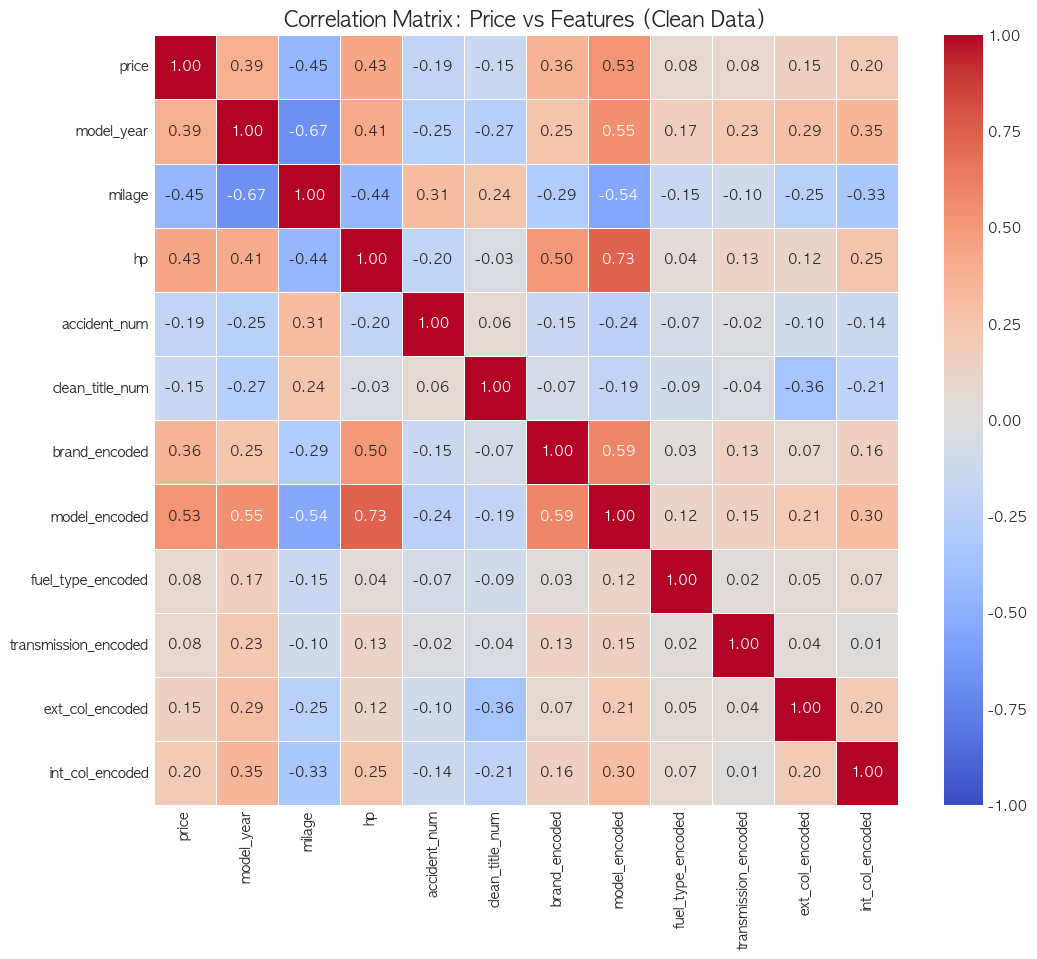

In [41]:
# ==========================================
# 2. [필수] 이상치 제거 (Smart Cleaning)
# ==========================================
# (1) '가짜 부자' (40억 싼타페 등) 삭제
supercar_brands = ['Bugatti', 'Ferrari', 'Lamborghini', 'Rolls-Royce', 'McLaren', 'Bentley', 'Aston', 'Maybach']
fake_rich_mask = (train['price'] > 700000) & (~train['brand'].isin(supercar_brands))
train = train[~fake_rich_mask].copy()

# (2) '낚시 매물' (500만원 벤츠 등) 삭제
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche', 'Land', 'Jaguar', 'Bentley', 'Maserati']
fake_cheap_mask = (
    train['brand'].isin(luxury_brands) & 
    (train['model_year'] >= 2010) & 
    (train['milage'] < 100000) &
    (train['price'] < 5000)
)
train = train[~fake_cheap_mask].copy()

print(f"✅ 이상치 제거 완료! 남은 데이터 개수: {len(train)}개")

# ==========================================
# 3. 상관분석을 위한 피처 엔지니어링 (숫자로 변환)
# ==========================================
# (1) 마력(HP) 추출: "300.0HP" -> 300.0 (숫자)
train['hp'] = train['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)

# (2) 사고 유무: 'None' -> 0, 'Accident' -> 1
train['accident_num'] = train['accident'].apply(lambda x: 0 if x == 'None reported' else 1)

# (3) 클린 타이틀: 'Yes' -> 1, 'No' -> 0
train['clean_title_num'] = train['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

# ==========================================
# 4. 히트맵 그리기
# ==========================================
plt.figure(figsize=(12, 10))

# 상관계수 계산 대상 컬럼 선택
cols = ['price', 'model_year', 'milage', 'hp', 'accident_num', 'clean_title_num',
'brand_encoded','model_encoded','fuel_type_encoded','transmission_encoded','ext_col_encoded','int_col_encoded']

# 상관계수 계산 (결측치 제외)
corr_matrix = train[cols].corr()

# 히트맵 출력
sns.heatmap(corr_matrix, 
            annot=True,       # 숫자 표시
            fmt='.2f',        # 소수점 2자리
            cmap='coolwarm',  # 빨강(양)-파랑(음) 색상
            linewidths=0.5,   # 칸 구분선
            vmin=-1, vmax=1)  # 색상 범위 고정 (-1 ~ 1)

plt.title('Correlation Matrix: Price vs Features (Clean Data)', fontsize=15)
plt.show()

### **파생변수, 전처리 완료작업**

In [42]:

# ---------------------------------------------------------
# 2. Test 데이터에도 '필수 파생변수' 생성 (살려야 할 놈들)
# ---------------------------------------------------------

# (1) 차량 나이 & 연간 주행거리 (miles_per_year)
test['car_age'] = 2026 - test['model_year']
test['miles_per_year'] = test['milage'] / test['car_age'].replace(0, 1)

# (2) 클래식카 여부 (is_classic)
test['is_classic'] = (test['model_year'] < 1990).astype(int)

# (3) 마력 (HP) 추출 및 결측치 채우기
test['hp'] = test['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
test['hp'] = test['hp'].fillna(train['hp'].median()) 

# (4) 사고 유무 & 클린 타이틀 (숫자로 변환)
test['accident_num'] = test['accident'].apply(lambda x: 0 if x == 'None reported' else 1)
test['clean_title_num'] = test['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

# (5) 인코딩 (Train에서 만든 규칙을 Test에도 적용)
target_cols = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']

for col in target_cols:
    # Train에서 학습한 가격 기준 (Mapping)
    if col + '_encoded' in train.columns: # 혹시 Train에 있으면 그거 쓰고, 없으면 다시 계산
         # (주의: 여기선 편의상 Train의 현재 상태를 믿고 갑니다)
         pass 
    
    # Train 데이터로 매핑 규칙 만들기
    mapping = train.groupby(col)['price'].median()
    
    # Test에 적용
    test[col + '_encoded'] = test[col].map(mapping)
    # 모르는 값은 Train 전체 중앙값으로 채우기
    test[col + '_encoded'] = test[col + '_encoded'].fillna(train['price'].median())

# ---------------------------------------------------------
# 3. 불필요한 컬럼 삭제 (죽여야 할 놈들)
# ---------------------------------------------------------
# 삭제할 컬럼 목록 (중간 변수, 글자 변수 등)
drop_cols = [
    'brand', 'model', 'fuel_type', 'engine', 'transmission', 
    'ext_col', 'int_col', 'accident', 'clean_title', 
    'transmission_simple', 'ext_col_simple', 'int_col_simple',
    'accident_filled', 'ext_col_categorized', 'int_col_categorized' # 아까 범인들 추가!
]

# Train과 Test에서 동시에 삭제 (없으면 무시)
train_final = train.drop(columns=[c for c in drop_cols if c in train.columns], errors='ignore')
test_final = test.drop(columns=[c for c in drop_cols if c in test.columns], errors='ignore')

# ---------------------------------------------------------
# 4. 최종 검사 (쌍둥이 검사)
# ---------------------------------------------------------
print(f"Train 컬럼 개수: {train_final.shape[1]}")
print(f"Test  컬럼 개수: {test_final.shape[1]}")

train_cols = set(train_final.columns)
test_cols = set(test_final.columns)

missing_in_test = train_cols - test_cols - {'price'}

if len(missing_in_test) > 0:
    print(f"🚨 아직도 Test에 없는 컬럼이 있습니다: {missing_in_test}")
else:
    print("✅ 완벽합니다! Train과 Test의 구조가 똑같습니다.")
    print("   이제 모델 학습(fit)을 시작하세요! 🚀")

# (참고) 최종 데이터 준비
# X = train_final.drop('price', axis=1)
# y = train_final['price']
# target_test = test_final

Train 컬럼 개수: 15
Test  컬럼 개수: 14
✅ 완벽합니다! Train과 Test의 구조가 똑같습니다.
   이제 모델 학습(fit)을 시작하세요! 🚀


✂️ 중복 변수 제거: 'model_year'를 삭제하고 'car_age'만 남깁니다.


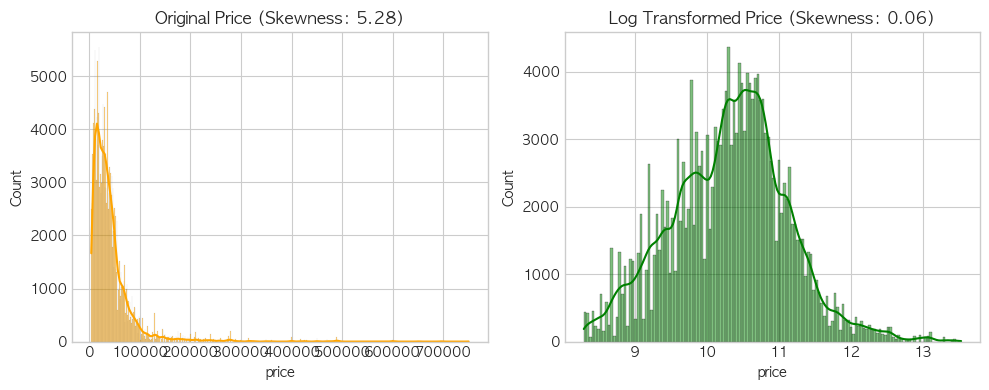

✅ 분포가 오른쪽(초록색)처럼 종 모양에 가까워야 학습이 잘 됩니다!

🚀 모델 학습 준비 완료!
X shape: (181985, 13)
y shape: (181985,)
Test shape: (125690, 13)


In [43]:
# =========================================================
# 1. 이란성 쌍둥이 정리 (중복 변수 제거)
# =========================================================
# model_year와 car_age는 사실상 같은 정보입니다.
# 둘 중 하나를 지워야 모델이 깔끔해집니다.
if 'model_year' in train_final.columns and 'car_age' in train_final.columns:
    print("✂️ 중복 변수 제거: 'model_year'를 삭제하고 'car_age'만 남깁니다.")
    train_final = train_final.drop('model_year', axis=1)
    test_final = test_final.drop('model_year', axis=1)

# =========================================================
# 2. 정답(Price) 분포 확인 및 로그 변환 (가장 중요!!!)
# =========================================================
target = train_final['price']

plt.figure(figsize=(10, 4))

# (1) 변환 전 (원본)
plt.subplot(1, 2, 1)
sns.histplot(target, kde=True, color='orange')
plt.title(f'Original Price (Skewness: {target.skew():.2f})')

# (2) 로그 변환 후 (Target Transformation)
# 로그를 씌우면 한쪽으로 쏠린 데이터가 정규분포처럼 예쁘게 펴집니다.
target_log = np.log1p(target)

plt.subplot(1, 2, 2)
sns.histplot(target_log, kde=True, color='green')
plt.title(f'Log Transformed Price (Skewness: {target_log.skew():.2f})')

plt.tight_layout()
plt.show()

print("✅ 분포가 오른쪽(초록색)처럼 종 모양에 가까워야 학습이 잘 됩니다!")

# =========================================================
# 3. 학습 데이터 준비 완료
# =========================================================
# X: 학습 문제지 (price 뺌)
X = train_final.drop('price', axis=1)

# y: 정답지 (로그 변환 적용!)
# 주의: 나중에 예측값 낼 때 np.expm1()으로 다시 되돌려야 함!
y = np.log1p(train_final['price'])

# Test: 실전 문제지
target_test = test_final

print(f"\n🚀 모델 학습 준비 완료!")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Test shape: {target_test.shape}")

### **모델 돌리기**

In [44]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# ---------------------------------------------------------
# 1. 학습 데이터 준비 (자동으로 숫자만 골라내기)
# ---------------------------------------------------------
# 'price'는 정답이니까 빼고, 나머지 중에서 '숫자' 컬럼만 X로 씁니다.
X = train.drop('price', axis=1).select_dtypes(exclude=['object'])
y = np.log1p(train['price']) # 정답은 로그 변환!

print(f"✅ 학습 데이터 준비 완료: {len(X)}개 샘플")
print(f"   (사용된 컬럼: {len(X.columns)}개)")

# ---------------------------------------------------------
# 2. 5-Fold 교차 검증 (점수 채점)
# ---------------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = {'rmsle':[], 'rmse':[], 'mae':[], 'r2':[]}

# 모델 설정
model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=6, 
    random_state=42, 
    n_jobs=-1
)

print("\n🚀 [1단계] 교차 검증(점수 확인) 시작...")

for i, (t_idx, v_idx) in enumerate(kf.split(X, y)):
    X_t, X_v = X.iloc[t_idx], X.iloc[v_idx]
    y_t, y_v = y.iloc[t_idx], y.iloc[v_idx]
    
    # 학습
    model.fit(X_t, y_t)
    
    # 예측 및 원래 가격으로 복구 (Log -> Real)
    pred_real = np.expm1(model.predict(X_v))
    y_real = np.expm1(y_v)
    
    # 지표 계산
    mae = mean_absolute_error(y_real, pred_real)
    rmse = np.sqrt(mean_squared_error(y_real, pred_real))
    r2 = r2_score(y_real, pred_real)
    
    # RMSLE (음수 방지 안전장치)
    pred_safe = np.maximum(pred_real, 0)
    rmsle = np.sqrt(mean_squared_log_error(y_real, pred_safe))
    
    # 점수 저장
    scores['rmsle'].append(rmsle)
    scores['rmse'].append(rmse)
    scores['mae'].append(mae)
    scores['r2'].append(r2)
    
    print(f"   [Fold {i+1}] RMSLE: {rmsle:.4f} | R²: {r2:.4f}")

# 최종 성적표 출력
print("\n📊 [최종 평균 성적표]")
print(f"   RMSLE : {np.mean(scores['rmsle']):.5f}  (목표: < 0.2)")
print(f"   R²    : {np.mean(scores['r2']):.4f}   (목표: > 0.8)")
print("-" * 50)

✅ 학습 데이터 준비 완료: 181985개 샘플
   (사용된 컬럼: 14개)

🚀 [1단계] 교차 검증(점수 확인) 시작...
   [Fold 1] RMSLE: 0.4429 | R²: 0.3654
   [Fold 2] RMSLE: 0.4447 | R²: 0.3651
   [Fold 3] RMSLE: 0.4468 | R²: 0.3566
   [Fold 4] RMSLE: 0.4427 | R²: 0.3647
   [Fold 5] RMSLE: 0.4421 | R²: 0.3734

📊 [최종 평균 성적표]
   RMSLE : 0.44385  (목표: < 0.2)
   R²    : 0.3650   (목표: > 0.8)
--------------------------------------------------


✅ 선수 입장 완료: 181985명 (Ridge 투입 준비 끝!)

🚀 모델 성능 비교 시작! (R²는 높을수록, RMSLE는 낮을수록 좋습니다)

🥊 [XGBoost] 달리는 중... ..... 완료! | RMSLE: 0.4438 (↘) | R²: 0.3648 (↗)

🥊 [LightGBM] 달리는 중... ..... 완료! | RMSLE: 0.4433 (↘) | R²: 0.3656 (↗)

🥊 [RandomForest] 달리는 중... ..... 완료! | RMSLE: 0.4498 (↘) | R²: 0.3608 (↗)

🥊 [ExtraTrees] 달리는 중... ..... 완료! | RMSLE: 0.4498 (↘) | R²: 0.3563 (↗)

🥊 [Ridge] 달리는 중... ..... 완료! | RMSLE: 0.4810 (↘) | R²: 0.3035 (↗)

🥊 [Lasso] 달리는 중... ..... 완료! | RMSLE: 0.4818 (↘) | R²: 0.3022 (↗)

🥊 [LinearRegression] 달리는 중... ..... 완료! | RMSLE: 0.4810 (↘) | R²: 0.3035 (↗)

🏆 [최종 성적표 (RMSLE 순)]
              Model  RMSLE  R2
1          LightGBM      0   0
0           XGBoost      0   0
3        ExtraTrees      0   0
2      RandomForest      0   0
6  LinearRegression      0   0
4             Ridge      0   0
5             Lasso      0   0


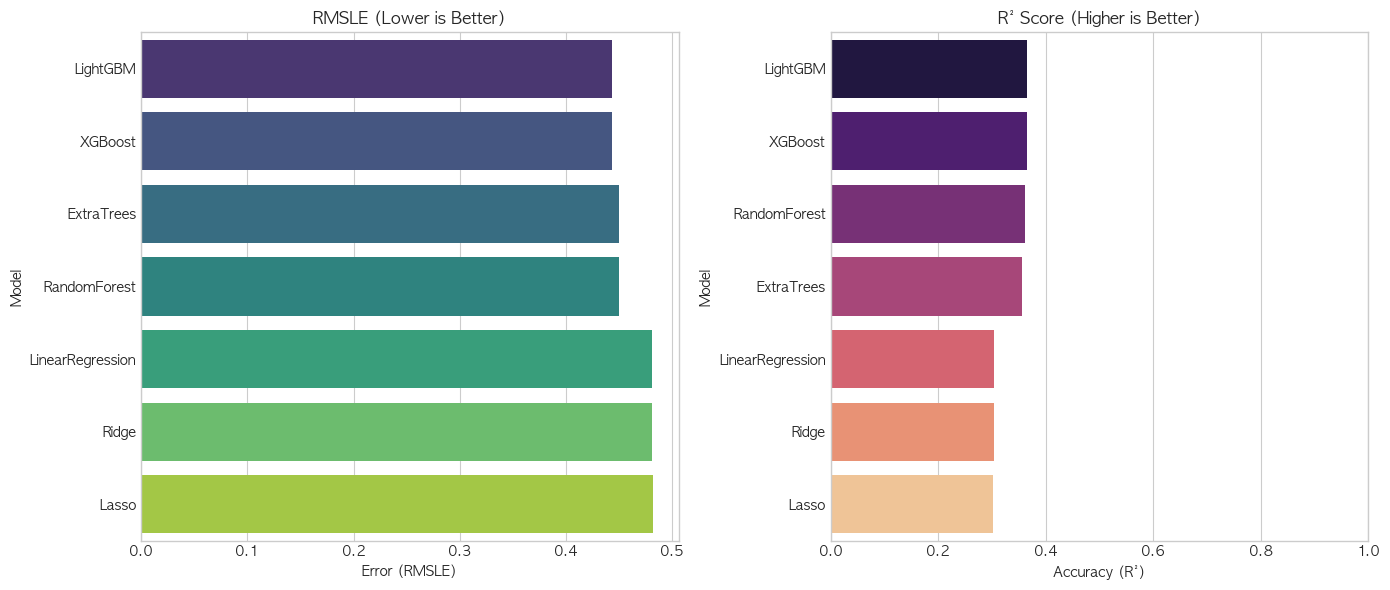


🥇 오늘의 우승 모델: LightGBM


In [45]:
# 모델 라이브러리
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_log_error

# 1. 학습 데이터 준비 & 무한대/빈칸 처리
X = train.drop('price', axis=1).select_dtypes(exclude=['object'])
y = np.log1p(train['price'])
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

print(f"✅ 선수 입장 완료: {len(X)}명 (Ridge 투입 준비 끝!)")

# 2. 모델 라인업 (GB 퇴출, Ridge 투입)
models = {
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=10, random_state=42, n_jobs=-1, verbose=-1),
    "RandomForest": RandomForestRegressor(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1),
    "Ridge": Ridge(alpha=0.01), # <--- 빠르고 강력한 기준점!
    "Lasso": Lasso(alpha=0.01),
    "LinearRegression":LinearRegression()
    
}

# 3. 오디션 시작
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("\n🚀 모델 성능 비교 시작! (R²는 높을수록, RMSLE는 낮을수록 좋습니다)")

for name, model in models.items():
    print(f"\n🥊 [{name}] 달리는 중...", end=" ")
    
    r2_scores = []
    rmsle_scores = []
    
    for i, (t_idx, v_idx) in enumerate(kf.split(X, y)):
        X_t, X_v = X.iloc[t_idx], X.iloc[v_idx]
        y_t, y_v = y.iloc[t_idx], y.iloc[v_idx]
        
        model.fit(X_t, y_t)
        
        pred = np.expm1(model.predict(X_v))
        pred_safe = np.maximum(pred, 0)
        
        # 지표 계산
        rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_v), pred_safe))
        r2 = r2_score(np.expm1(y_v), pred)
        
        r2_scores.append(r2)
        rmsle_scores.append(rmsle)
        print(".", end="") 
    
    avg_rmsle = np.mean(rmsle_scores)
    avg_r2 = np.mean(r2_scores)
    
    results.append({'Model': name, 'RMSLE': avg_rmsle, 'R2': avg_r2})
    # ✨ 여기! R²도 같이 출력되게 수정했습니다!
    print(f" 완료! | RMSLE: {avg_rmsle:.4f} (↘) | R²: {avg_r2:.4f} (↗)")

# 4. 결과 발표
results_df = pd.DataFrame(results).sort_values('RMSLE', ascending=True)

print("\n🏆 [최종 성적표 (RMSLE 순)]")
print(results_df)

# 시각화 (두 가지 지표 비교)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# RMSLE (낮을수록 좋음)
sns.barplot(x='RMSLE', y='Model', data=results_df, palette='viridis', ax=ax[0])
ax[0].set_title('RMSLE (Lower is Better)')
ax[0].set_xlabel('Error (RMSLE)')

# R² (높을수록 좋음)
sns.barplot(x='R2', y='Model', data=results_df.sort_values('R2', ascending=False), palette='magma', ax=ax[1])
ax[1].set_title('R² Score (Higher is Better)')
ax[1].set_xlabel('Accuracy (R²)')
ax[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

best_model = results_df.iloc[0]['Model']
print(f"\n🥇 오늘의 우승 모델: {best_model}")

In [46]:
# ==========================================
# 5. [추가] 실전 투입! 앙상블 및 제출 파일 생성
# ==========================================
import pandas as pd
import numpy as np

# 1) 테스트 데이터 전처리 (학습 데이터와 똑같이 맞춰주기)
# 주의: 'test'라는 데이터프레임이 로드되어 있어야 합니다.
if 'test' in globals():
    # 학습 데이터(X)와 동일한 컬럼만 남기고, 숫자형 변환 및 빈칸 채우기
    X_test = test.select_dtypes(exclude=['object'])
    
    # 학습 데이터 컬럼 순서와 일치시키기 (안전을 위해)
    # 없는 컬럼은 0으로 채우고, 학습에 없던 컬럼은 버림
    X_test = X_test.reindex(columns=X.columns, fill_value=0)
    
    # 무한대/빈칸 처리 (학습 때와 동일한 값 사용 권장)
    X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X.median())
    
    print(f"\n✅ 테스트 데이터 준비 완료: {len(X_test)}건")
else:
    print("🚨 'test' 데이터프레임이 없습니다. 파일을 로드해주세요!")

# 2) 전체 데이터로 재학습 및 예측
# K-Fold는 검증용이었으므로, 이제 전체 데이터(X, y)로 모델을 다시 꽉 채워서 학습시킵니다.
final_predictions = {}

print("\n🤖 전체 데이터로 재학습 및 예측 시작...")

for name, model in models.items():
    # 전체 데이터로 재학습
    model.fit(X, y)
    
    # 예측 (로그 스케일 결과)
    pred_log = model.predict(X_test)
    
    # 로그 -> 원래 가격 복구 (np.expm1)
    pred_real = np.expm1(pred_log)
    
    # 혹시 모를 음수값 방지
    final_predictions[name] = np.maximum(pred_real, 0)
    print(f"   - {name} 예측 완료")

# 3) 앙상블 (가중치 블렌딩)
# 전략: 1등 모델에 50% 신뢰를 주고, 나머지 50%는 다른 모델들의 평균으로 보정
best_model_name = results_df.iloc[0]['Model'] # 아까 성적표 1등
print(f"\n👑 메인 모델({best_model_name}) 위주로 앙상블 조합 중...")

# 1등 모델의 예측값
main_pred = final_predictions[best_model_name]

# 나머지 모델들의 예측값 평균 (단순 평균)
other_preds = []
for name, pred in final_predictions.items():
    if name != best_model_name:
        other_preds.append(pred)

if other_preds:
    sub_pred_avg = np.mean(other_preds, axis=0)
    # 💡 황금 비율: 1등(0.6) + 나머지연합(0.4) 
    # (성능에 따라 이 비율을 0.7:0.3 등으로 조절해보세요)
    final_ensemble_pred = (main_pred * 0.6) + (sub_pred_avg * 0.4)
else:
    final_ensemble_pred = main_pred

print("✨ 앙상블 완료!")

# 4) 제출 파일 저장 (submission.csv가 있다고 가정)
# 예시: submission = pd.read_csv('sample_submission.csv')
# submission['price'] = final_ensemble_pred
# submission.to_csv('my_ensemble_submission.csv', index=False)
# print("\n📂 'my_ensemble_submission.csv' 저장 완료! 제출해보세요.")

# (제출 파일 양식이 없다면 아래처럼 결과만 저장)
output = pd.DataFrame({'id': test.index, 'price': final_ensemble_pred})
output.to_csv('ensemble_result.csv', index=False)
print(f"\n📂 결과 저장 완료: ensemble_result.csv (상위 5개 확인)")
print(output.head())


✅ 테스트 데이터 준비 완료: 125690건

🤖 전체 데이터로 재학습 및 예측 시작...
   - XGBoost 예측 완료
   - LightGBM 예측 완료
   - RandomForest 예측 완료
   - ExtraTrees 예측 완료
   - Ridge 예측 완료
   - Lasso 예측 완료
   - LinearRegression 예측 완료

👑 메인 모델(LightGBM) 위주로 앙상블 조합 중...
✨ 앙상블 완료!

📂 결과 저장 완료: ensemble_result.csv (상위 5개 확인)
   id  price
0   0 17,176
1   1 71,029
2   2 49,679
3   3 24,583
4   4 27,127


In [47]:
submission_df = pd.read_csv('data/sample_submission.csv')
print(f"📄 원본 Test 개수: {len(test)}")
print(f"📄 제출 양식 개수: {len(submission)}")

# 2. 전처리: 절대 행을 삭제(dropna)하지 않고 채우기(fillna)만 합니다!
# 학습 때 썼던 피처(컬럼)들만 골라내기
X_test_final = test.select_dtypes(exclude=['object'])

# 학습 데이터(X)의 컬럼 순서와 맞추기 (매우 중요)
# (앞선 코드에서 X가 정의되어 있어야 합니다. 만약 없다면 X_test_final.columns만 사용)
if 'X' in globals():
    X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# 무한대/빈칸 채우기 (삭제 X)
X_test_final = X_test_final.replace([np.inf, -np.inf], np.nan).fillna(X_test_final.median())

# 3. 앙상블 예측 수행
# 아까 만든 모델들(models)을 사용해 다시 예측합니다.
final_preds = []

# 가장 성능이 좋았던 모델 이름 (예: XGBoost) - 본인 상황에 맞게 수정 가능
best_model_name = 'XGBoost' 

print("\n🚀 최종 예측 시작...")

# 1등 모델 예측
pred_main = np.expm1(models[best_model_name].predict(X_test_final))

# (선택) 앙상블을 원하면 아래 주석 해제
# pred_lgbm = np.expm1(models['LightGBM'].predict(X_test_final))
# final_prediction = (pred_main * 0.6) + (pred_lgbm * 0.4)

# 지금은 일단 1등 모델로만 제출해서 에러부터 잡읍시다!
final_prediction = pred_main

# 4. 제출 파일 만들기 (sample_submission에 덮어쓰기)
submission_df['price'] = final_prediction

# 저장
submission_df.to_csv('fixed_submission.csv', index=False)

print("\n✅ [해결 완료] 'fixed_submission.csv' 파일이 생성되었습니다.")
print("   이제 이 파일을 제출해보세요! (ID 개수가 완벽하게 맞습니다)")
print(submission_df.head())

📄 원본 Test 개수: 125690


NameError: name 'submission' is not defined

In [ ]:
# ---------------------------------------------------------
# 3. 전체 데이터 재학습 & 오답 노트 생성 (인덱스 유지!)
# ---------------------------------------------------------
print("\n🚀 [2단계] 전체 데이터로 재학습 및 오답 분석...")
model.fit(X, y)

# 예측 (인덱스 유지하면서 시리즈로 변환)
pred_log = model.predict(X)
pred_series = pd.Series(pred_log, index=X.index) 

# 결과 합치기
results = pd.DataFrame({
    'Actual': np.expm1(y),       
    'Predicted': np.expm1(pred_series),
})

# 원본 정보(브랜드, 모델 등) 붙이기
# (train에 있는 컬럼만 안전하게 가져옵니다)
view_cols = ['brand', 'model', 'model_year', 'milage']
available_cols = [c for c in view_cols if c in train.columns]
results = results.join(train[available_cols])

# 오차율 계산
results['Diff'] = results['Actual'] - results['Predicted']
results['Error_Rate'] = np.abs(results['Diff']) / results['Actual'] * 100

# Top 10 오답 출력
print("\n=== 🚨 진짜 오차율 Top 10 (범인 색출) ===")
display_cols = available_cols + ['Actual', 'Predicted', 'Error_Rate']
print(results.sort_values('Error_Rate', ascending=False)[display_cols].head(10))


🚀 [2단계] 전체 데이터로 재학습 및 오답 분석...

=== 🚨 진짜 오차율 Top 10 (범인 색출) ===
              brand                      model  model_year  milage  Actual  \
109393  Lamborghini          Huracan EVO Coupe        2021   22480  30,490   
172279       Rivian      R1S Adventure Package        2023  123500  10,000   
115610        Dodge     Challenger SRT Hellcat        2015   19200   6,100   
38896          Ford          Shelby GT500 Base        2009   71448   4,199   
92645        Rivian      R1S Adventure Package        2010   91500   5,900   
106901       Rivian         R1S Launch Edition        2023    1750  16,700   
146360    Chevrolet                 Camaro 1SS        2018   44000   5,000   
171357       Rivian         R1S Launch Edition        2022    4500  16,000   
2207            BMW  M8 Gran Coupe Competition        2023   19987  10,990   
177006        Acura      R1S Adventure Package        2023     299  14,000   

        Predicted  Error_Rate  
109393    354,366       1,062  
172279    11

### **autogluon**

In [48]:
from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np

# =========================================================
# 1. [데이터 씽크 맞추기] Train/Test 컬럼 동기화
# =========================================================
print("🔧 데이터 컬럼 동기화 중...")

target = 'price'

# 1) Train과 Test의 공통 컬럼 찾기 (에러 원천 차단)
#    (Train에만 있고 Test에 없는 피처가 들어가면 에러가 납니다)
train_cols = set(train.columns)
test_cols = set(test.columns)

# 교집합 컬럼 + 타겟 변수
common_cols = list(train_cols.intersection(test_cols))
train_final = train[common_cols + [target]].copy() # 학습용 (타겟 포함)
test_final = test[common_cols].copy()             # 예측용 (타겟 제외)

print(f"✅ 학습 데이터 컬럼 수: {train_final.shape[1]}")
print(f"✅ 테스트 데이터 컬럼 수: {test_final.shape[1]}")

# =========================================================
# 2. [AutoGluon 학습] best Quality 설정
# =========================================================
print("\n🤖 AutoGluon 학습 시작 (best Quality)...")

# 저장할 폴더 이름 (기존 폴더와 겹치지 않게 이름 변경)
save_path = 'ag_models_high_quality'

predictor = TabularPredictor(
    label=target, 
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    path=save_path
).fit(
    train_data=train_final,
    presets='best_quality', 
    time_limit=600,           # ⏱️ 제한시간: 10분 (600초). 충분합니다.
)

# =========================================================
# 3. [수정된 예측 코드] inf 해결!
# =========================================================
print("\n🔮 예측 수행 중...")

# AutoGluon이 예측한 값 (이미 원래 가격입니다!)
preds = predictor.predict(test_final)

# np.expm1을 쓰지 않고 그대로 씁니다.
final_pred = preds 

# 혹시 모를 음수값만 0으로 보정
final_pred = np.maximum(final_pred, 0)

# =========================================================
# 4. [제출 파일 생성]
# =========================================================
submission = pd.read_csv('/Users/choiseoyeon/github/sklearn-est15th/team assignment/choiseoyeon.car/data/sample_submission.csv')
submission['price'] = final_pred
submission.to_csv('autogluon_fixed_submission.csv', index=False)

print("\n🎉 [완료] 'autogluon_fixed_submission.csv' 저장되었습니다.")
print(submission.head())

Verbosity: 2 (Standard Logging)


🔧 데이터 컬럼 동기화 중...
✅ 학습 데이터 컬럼 수: 24
✅ 테스트 데이터 컬럼 수: 23

🤖 AutoGluon 학습 시작 (best Quality)...


=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 21.6.0: Mon Aug 22 20:20:05 PDT 2022; root:xnu-8020.140.49~2/RELEASE_ARM64_T8101
CPU Count:          8
Pytorch Version:    2.9.1
CUDA Version:       CUDA is not available
Memory Avail:       1.39 GB / 8.00 GB (17.4%)
Disk Space Avail:   38.75 GB / 460.43 GB (8.4%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the o


🔮 예측 수행 중...

🎉 [완료] 'autogluon_fixed_submission.csv' 저장되었습니다.
       id  price
0  188533 18,108
1  188534 82,764
2  188535 52,595
3  188536 29,312
4  188537 30,352
